In [37]:
#import all needed packages

import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn import decomposition, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification


#sampling methods
from collections import Counter 
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek 
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

#models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve,auc,precision_recall_curve,roc_curve
from sklearn.metrics import average_precision_score

#set settings so we can see every row and column
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 60)

In [2]:
#change my own working directory for importing the files

import os
os.getcwd()
os.chdir('/Users/michellemak/Google Drive/Tilburg University/Master/Master Thesis/Code/Data/Raw data/')
os.getcwd()

#read the dataset and show a sample of 10 rows of the dataset
waves = pd.read_csv("waves_cleaned3003.csv", low_memory=False)
waves.sample(10)

,Geslacht,Leeftijd,Woonplaats,Covid_result,Huishouden,ThuiswonendeKinderen_0-3,ThuiswonendeKinderen_4-12,ThuiswonendeKinderen_13-17,ThuiswonendeKinderen_18+,HoogsteOpleiding,CruciaalBeroep,DirectContact,DirectContactMetCovid,NormaleWeek_Thuiswerken,NormaleWeek_Buitenshuiswerken,Normaleweek_Nietwerken,CoronaWeek_Thuiswerken,CoronaWeek_Buitenshuiswerk,CoronaWeek_Nietwerken,HoeveelPersonenContact,Klacht_Neusverkoudheid,Klacht_Keelpijn,Klacht_DrogeHoest,Klacht_Vermoedheid,Klacht_SlijmHoest,Klacht_SpierGewrichtspijn,Klacht_Hoofdpijn,Klacht_Koorts,Klacht_Kortademig,Klacht_Diarree,Klacht_Misselijkheid,Klacht_Overgeven,Klacht_Rillingen,Klacht_Niezen,Klacht_Huiduitslag,Klacht_Verward,Klacht_VerslapteSpieren,Klacht_GeenReukSmaak,RIVM_HandenWassen,RIVM_GrondigHandenWassen,RIVM_GeenHandenSchudden,RIVM_PapierZakdoek,RIVM_Elleboog,RIVM_ThuisblijvenSymptomen,RIVM_Thuiswerken,RIVM_1.5mAfstand,RIVM_VermijdenGroepen,Extra_Niets,Extra_OpenbaarVermijden,Extra_WinkelsVermijden,Extra_Schoonmaak,Extra_DesinfectieGebruik,Extra_DesinfectieGelDragen,Extra_Gezichtsmasker,Extra_Supplementen,Extra_ContactMinimaliseren,Extra_GezondEten
8623,0,24.0,853,1,5.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,2.0,0.0,4.0,3.0,3.0,2.0,2.0,7.0,1.0,2.0,2.0,4.0,2.0,2.0,3.0,4.0,2.0,1.0,1.0,1.0,3.0,3.0,2.0,1.0,4.0,5.0,2.0,3.0,1.0,3.0,2.0,2.0,3.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7641,0,55.0,44,0,3.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,1.0,0.0,3.0,4.0,0.0,3.0,4.0,15.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
8666,1,59.0,576,0,4.0,0.0,0.0,0.0,1.0,6.0,1.0,2.0,2.0,1.0,4.0,2.0,5.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,5.0,1.0,1.0,1.0,6.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
6093,0,28.0,1047,0,3.0,0.0,0.0,0.0,0.0,6.0,2.0,2.0,2.0,1.0,3.0,3.0,4.0,0.0,3.0,0.0,4.0,3.0,5.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1780,0,35.0,853,0,4.0,1.0,1.0,1.0,0.0,3.0,1.0,2.0,2.0,0.0,3.0,4.0,0.0,3.0,4.0,300.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,2.0,2.0,3.0,2.0,5.0,1.0,1.0,1.0,5.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,5.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3890,1,69.0,954,0,3.0,0.0,0.0,0.0,0.0,5.0,1.0,2.0,2.0,0.0,0.0,7.0,0.0,0.0,7.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5192,0,62.0,414,0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,2.0,0.0,4.0,0.0,0.0,4.0,0.0,14.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,6.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6452,1,73.0,107,0,1.0,0.0,0.0,0.0,0.0,5.0,1.0,2.0,2.0,0.0,0.0,7.0,0.0,0.0,7.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,3.0,2.0,6.0,6.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3868,0,52.0,896,0,4.0,0.0,0.0,1.0,0.0,4.0,1.0,2.0,2.0,0.0,5.0,0.0,3.0,2.0,0.0,6.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,6.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4894,0,65.0,7,0,3.0,0.0,0.0,0.0,0.0,5.0,3.0,2.0,2.0,0.0,4.0,3.0,0.0,3.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# We start by making the data ready for the modeling

## Divide the columns into independent (X) and dependent (y) values

In [3]:
X = waves.drop('Covid_result', axis=1)
y = waves['Covid_result']

In [4]:
# transform the datatype
X = X.to_numpy()

#make sure that the input is all in numpy arrays
encoder = LabelEncoder() 
encoder.fit(y)
y = encoder.transform(y)

In [8]:
#make an extra variable for the column names, we will need this later
X_names = waves.drop('Covid_result', axis=1)

## Split the data into training and test set
random_state = to make sure every time we run the model, the outcome is the same \
stratify = y makes sure that the proportions of y are the same in the training and test set: especially important because of the imbalanced data a random set could be that all the minorty class labels are in the test set of other way around

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y, shuffle=True)

In [6]:
# Check with the shapes of training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (7081, 56)
y_train -  (7081,)
X_test -  (3036, 56)
y_test -  (3036,)


## Scale the data
we fit the scaler only on the training set, and transform on the training and test set

In [7]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Implement the different sampling methods

In [9]:
#print the sizes of the classes before the resampling steps
print("Before resampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before resampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

Before resampling, counts of label '1': 1040
Before resampling, counts of label '0': 6041 



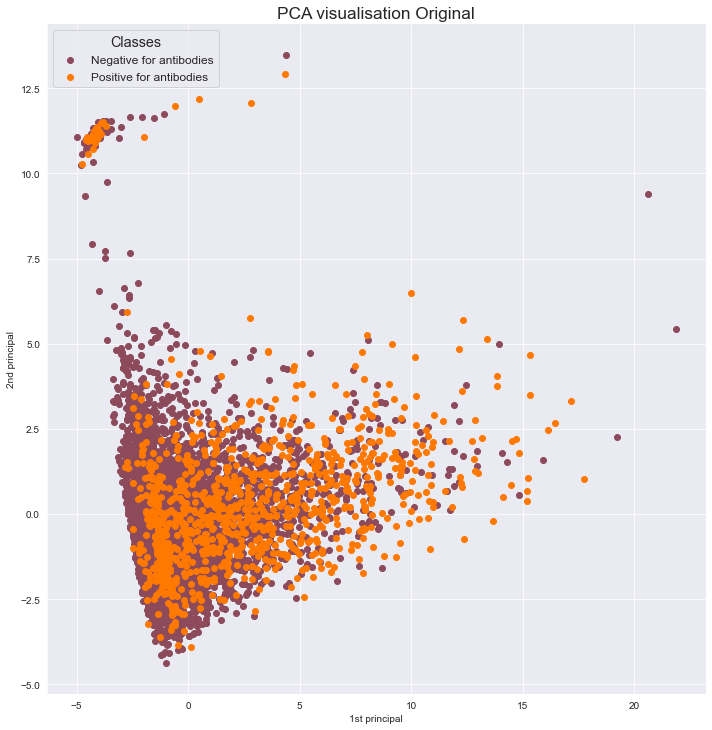

In [52]:
#dimensionality reduction for the scatterplot to make sense
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(X_train)
#print('pca reduced shape = ', pca_data.shape)

pca_data = np.vstack((pca_data.T, y_train)).T
#print(pca_data.T)
#print(pca_data.shape)

#make a new dataframe
pca_df = pd.DataFrame(data=pca_data, columns=('1st principal', '2nd principal', 'label'))

#changing colors to Sanquin colors
custom_palette = ['#8c4a5b','#ff7900']
sns.set_palette(custom_palette)
sns.set_style('darkgrid')

#mke the plot
g = sns.FacetGrid(pca_df, hue = 'label', height=10).map(plt.scatter, '1st principal', '2nd principal')#.add_legend()

#set the legend and title
plt.legend(title='Classes', fontsize='large', title_fontsize='x-large', loc='upper left', labels=['Negative for antibodies','Positive for antibodies'])
plt.title('PCA visualisation Original', fontsize='xx-large')

plt.show()

## 1. (u) Tomek Links

In [10]:
tl = TomekLinks(sampling_strategy='majority')

X_train_tl, y_train_tl = tl.fit_sample(X_train, y_train)
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_tl == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_tl == 0))) 

After OverSampling, counts of label '1': 1040
After OverSampling, counts of label '0': 5898


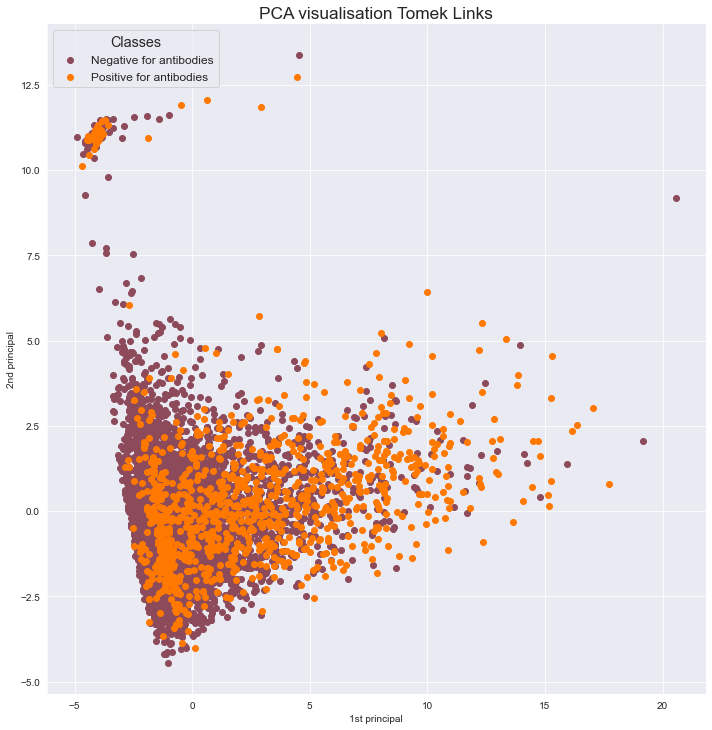

In [51]:
#dimensionality reduction for the scatterplot to make sense
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(X_train_tl)
#print('pca reduced shape = ', pca_data.shape)

pca_data = np.vstack((pca_data.T, y_train_tl)).T
#print(pca_data.T)
#print(pca_data.shape)

#make a new dataframe
pca_df = pd.DataFrame(data=pca_data, columns=('1st principal', '2nd principal', 'label'))

#changing colors to Sanquin colors
custom_palette = ['#8c4a5b','#ff7900']
sns.set_palette(custom_palette)
sns.set_style('darkgrid')

#mke the plot
g = sns.FacetGrid(pca_df, hue = 'label', height=10).map(plt.scatter, '1st principal', '2nd principal')#.add_legend()

#set the legend and title
plt.legend(title='Classes', fontsize='large', title_fontsize='x-large', loc='upper left', labels=['Negative for antibodies','Positive for antibodies'])
plt.title('PCA visualisation Tomek Links', fontsize='xx-large')

plt.show()

## 2. (u) Edited Nearest Neighbors

In [11]:
enn = EditedNearestNeighbours(n_neighbors=1)

X_train_enn, y_train_enn = enn.fit_sample(X_train, y_train) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train_enn == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_enn == 0))) 

After OverSampling, counts of label '1': 1040
After OverSampling, counts of label '0': 5513


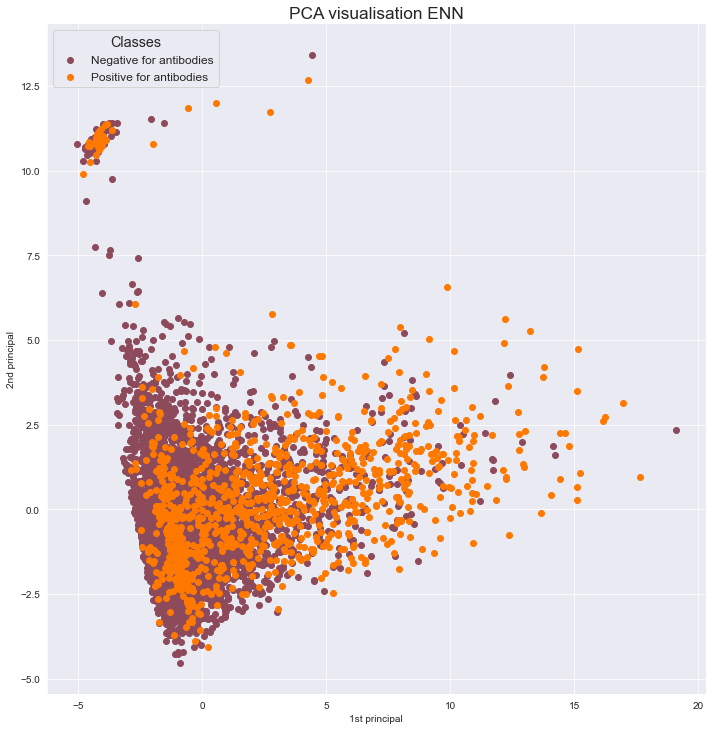

In [50]:
#dimensionality reduction for the scatterplot to make sense
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(X_train_enn)
#print('pca reduced shape = ', pca_data.shape)

pca_data = np.vstack((pca_data.T, y_train_enn)).T
#print(pca_data.T)
#print(pca_data.shape)

#make a new dataframe
pca_df = pd.DataFrame(data=pca_data, columns=('1st principal', '2nd principal', 'label'))

#changing colors to Sanquin colors
custom_palette = ['#8c4a5b','#ff7900']
sns.set_palette(custom_palette)
sns.set_style('darkgrid')

#mke the plot
g = sns.FacetGrid(pca_df, hue = 'label', height=10).map(plt.scatter, '1st principal', '2nd principal')#.add_legend()

#set the legend and title
plt.legend(title='Classes', fontsize='large', title_fontsize='x-large', loc='upper left', labels=['Negative for antibodies','Positive for antibodies'])
plt.title('PCA visualisation ENN', fontsize='xx-large')

plt.show()

## 3. (o) SMOTE

In [12]:
sm = SMOTE(random_state= 2)

X_train_smt, y_train_smt = sm.fit_sample(X_train, y_train) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_smt == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smt == 0))) 

After OverSampling, counts of label '1': 6041
After OverSampling, counts of label '0': 6041


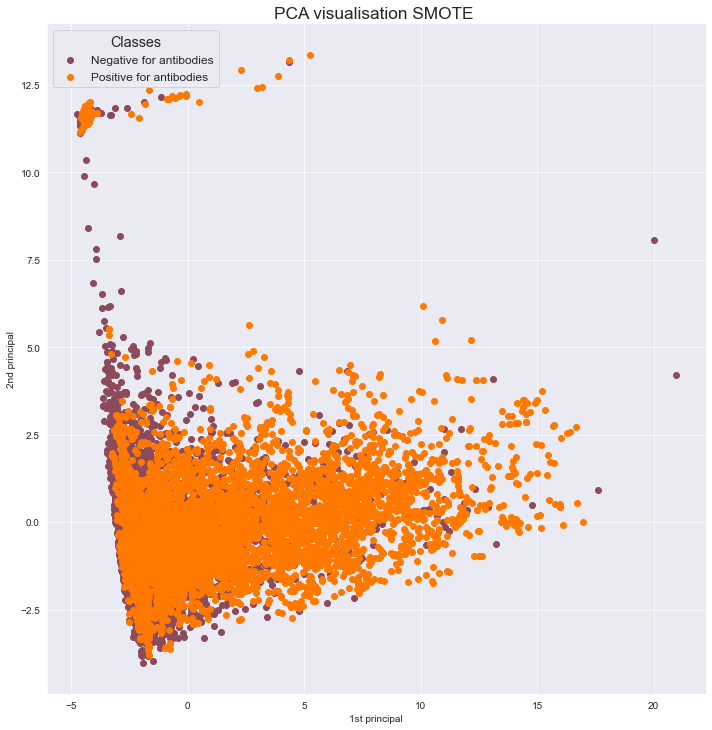

In [49]:
#dimensionality reduction for the scatterplot to make sense
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(X_train_smt)
#print('pca reduced shape = ', pca_data.shape)

pca_data = np.vstack((pca_data.T, y_train_smt)).T
#print(pca_data.T)
#print(pca_data.shape)

#make a new dataframe
pca_df = pd.DataFrame(data=pca_data, columns=('1st principal', '2nd principal', 'label'))

#changing colors to Sanquin colors
custom_palette = ['#8c4a5b','#ff7900']
sns.set_palette(custom_palette)
sns.set_style('darkgrid')

#mke the plot
g = sns.FacetGrid(pca_df, hue = 'label', height=10).map(plt.scatter, '1st principal', '2nd principal')#.add_legend()

#set the legend and title
plt.legend(title='Classes', fontsize='large', title_fontsize='x-large', loc='upper left', labels=['Negative for antibodies','Positive for antibodies'])
plt.title('PCA visualisation SMOTE ', fontsize='xx-large')

plt.show()

## 4. (o) ADASYN

In [13]:
ada = ADASYN(random_state= 2, sampling_strategy=1)

X_train_ada, y_train_ada = ada.fit_sample(X_train, y_train) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train_ada == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_ada == 0))) 

After OverSampling, counts of label '1': 5763
After OverSampling, counts of label '0': 6041


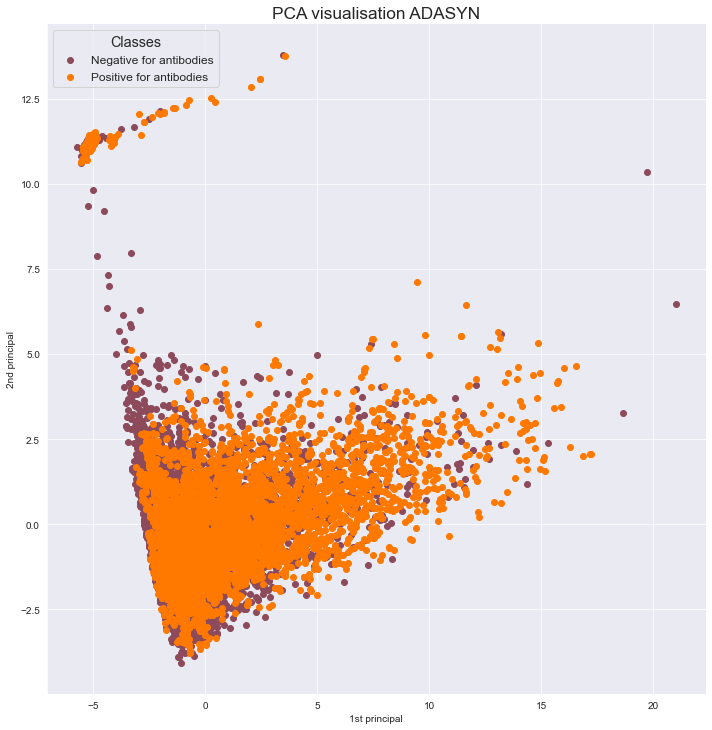

In [48]:
#dimensionality reduction for the scatterplot to make sense
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(X_train_ada)
#print('pca reduced shape = ', pca_data.shape)

pca_data = np.vstack((pca_data.T, y_train_ada)).T
#print(pca_data.T)
#print(pca_data.shape)

#make a new dataframe
pca_df = pd.DataFrame(data=pca_data, columns=('1st principal', '2nd principal', 'label'))

#changing colors to Sanquin colors
custom_palette = ['#8c4a5b','#ff7900']
sns.set_palette(custom_palette)
sns.set_style('darkgrid')

#mke the plot
g = sns.FacetGrid(pca_df, hue = 'label', height=10).map(plt.scatter, '1st principal', '2nd principal')#.add_legend()

#set the legend and title
plt.legend(title='Classes', fontsize='large', title_fontsize='x-large', loc='upper left', labels=['Negative for antibodies','Positive for antibodies'])
plt.title('PCA visualisation ADASYN', fontsize='xx-large')

plt.show()

## 5. (c) SMOTE & Tomek Links

In [14]:
smt_tm = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

X_train_smt_tl, y_train_smt_tl = smt_tm.fit_sample(X_train, y_train) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_smt_tl == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smt_tl == 0))) 

After OverSampling, counts of label '1': 6041
After OverSampling, counts of label '0': 6039


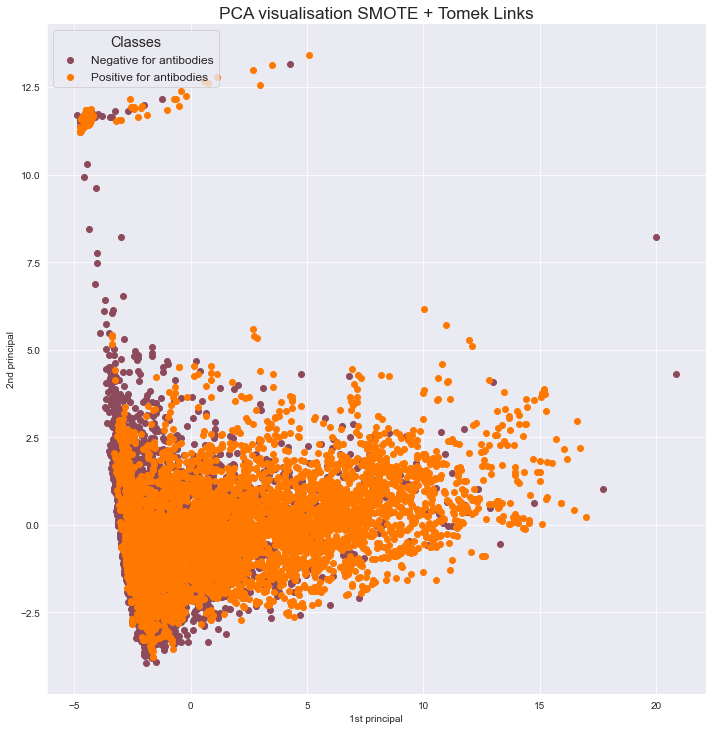

In [46]:
#dimensionality reduction for the scatterplot to make sense
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(X_train_smt_tl)
#print('pca reduced shape = ', pca_data.shape)

pca_data = np.vstack((pca_data.T, y_train_smt_tl)).T
#print(pca_data.T)
#print(pca_data.shape)

#make a new dataframe
pca_df = pd.DataFrame(data=pca_data, columns=('1st principal', '2nd principal', 'label'))

#changing colors to Sanquin colors
custom_palette = ['#8c4a5b','#ff7900']
sns.set_palette(custom_palette)
sns.set_style('darkgrid')

#mke the plot
g = sns.FacetGrid(pca_df, hue = 'label', height=10).map(plt.scatter, '1st principal', '2nd principal')#.add_legend()

#set the legend and title
plt.legend(title='Classes', fontsize='large', title_fontsize='x-large', loc='upper left', labels=['Negative for antibodies','Positive for antibodies'])
plt.title('PCA visualisation SMOTE + Tomek Links', fontsize='xx-large')

plt.show()

## 6. (c) SMOTE & ENN 

In [15]:
smt_enn = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))

X_train_smt_enn, y_train_smt_enn = smt_enn.fit_sample(X_train, y_train) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_smt_enn == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smt_enn == 0))) 

After OverSampling, counts of label '1': 6041
After OverSampling, counts of label '0': 3201


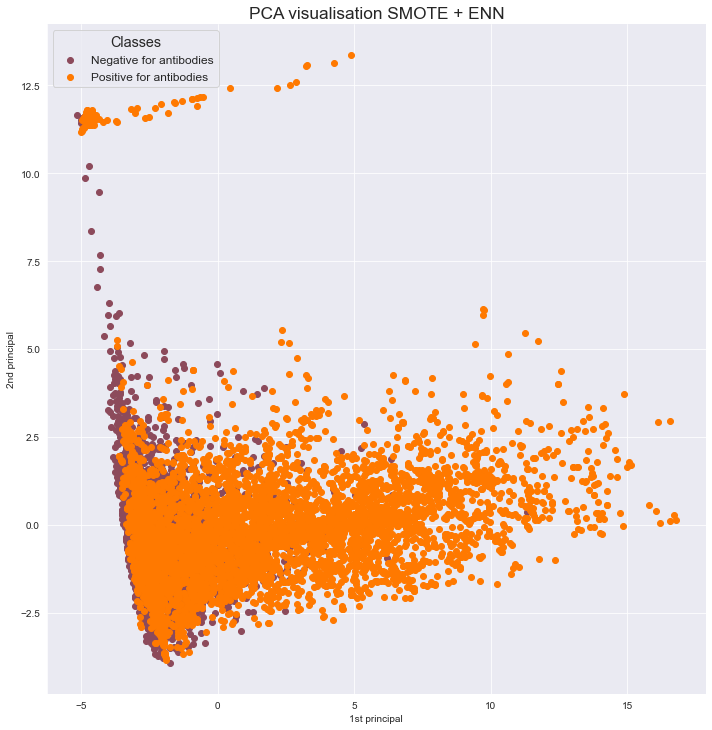

In [40]:
#dimensionality reduction for the scatterplot to make sense
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(X_train_smt_enn)
#print('pca reduced shape = ', pca_data.shape)

pca_data = np.vstack((pca_data.T, y_train_smt_enn)).T
#print(pca_data.T)
#print(pca_data.shape)

#make a new dataframe
pca_df = pd.DataFrame(data=pca_data, columns=('1st principal', '2nd principal', 'label'))

#changing colors to Sanquin colors
custom_palette = ['#8c4a5b','#ff7900']
sns.set_palette(custom_palette)
sns.set_style('darkgrid')

#mke the plot
g = sns.FacetGrid(pca_df, hue = 'label', height=10).map(plt.scatter, '1st principal', '2nd principal')#.add_legend()

#set the legend and title
plt.legend(title='Classes', fontsize='large', title_fontsize='x-large', loc='upper left', labels=['Negative for antibodies','Positive for antibodies'])
plt.title('PCA visualisation SMOTE + ENN', fontsize='xx-large')

plt.show()

## An extra dummy dataset is created here, we will use this to compare the original dataset using visualization 

In [101]:
XX, yy = make_classification(n_samples=7000, n_features=53, weights=[0.85,0.15])
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=101, stratify=yy, shuffle=True)

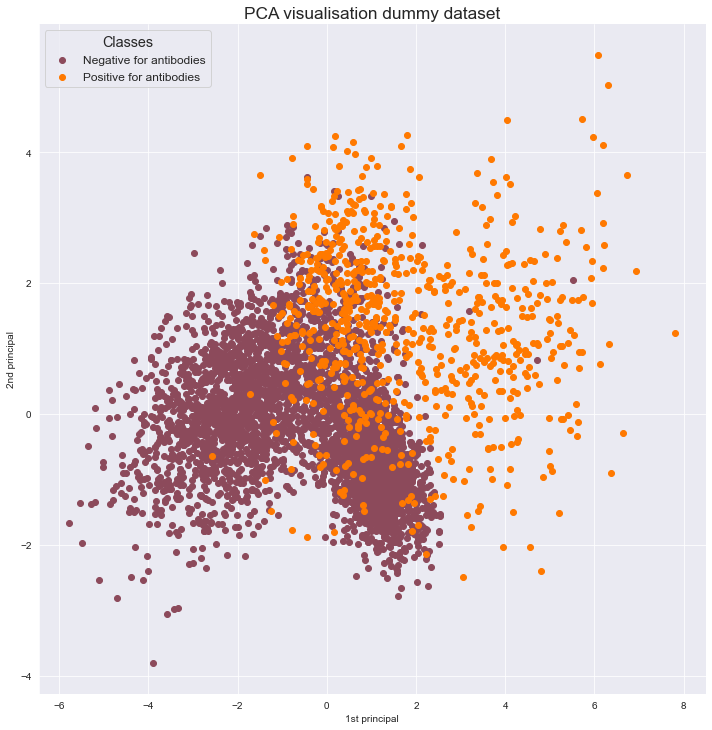

In [103]:
#dimensionality reduction for the scatterplot to make sense
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(XX_train)
#print('pca reduced shape = ', pca_data.shape)

pca_data = np.vstack((pca_data.T, yy_train)).T
#print(pca_data.T)
#print(pca_data.shape)

#make a new dataframe
pca_df = pd.DataFrame(data=pca_data, columns=('1st principal', '2nd principal', 'label'))

#changing colors to Sanquin colors
custom_palette = ['#8c4a5b', '#ff7900']
sns.set_palette(custom_palette)
sns.set_style('darkgrid')

#mke the plot
g = sns.FacetGrid(pca_df, hue = 'label', height=10).map(plt.scatter, '1st principal', '2nd principal')#.add_legend()

#set the legend and title
plt.legend(title='Classes', fontsize='large', title_fontsize='x-large', loc='upper left', labels=['Negative for antibodies', 'Positive for antibodies'])
plt.title('PCA visualisation dummy dataset', fontsize='xx-large')

plt.savefig('PCA visualisation dummy dataset.png', bbox_inches='tight', dpi=150)

plt.show()

# Function to print results all in the same format

In [16]:
def print_results(headline, y_true, y_pred, y_prob):
    print(headline)
    print()
    print('Confusion Matrix:')
    print(metrics.confusion_matrix(y_true, y_pred))
    print()
    print('Classification Report:')
    print(metrics.classification_report(y_true,y_pred))
    print("accuracy: {}".format(round(metrics.accuracy_score(y_true, y_pred),3)))
    print("precision: {}".format(round(metrics.precision_score(y_true, y_pred),3)))
    print("recall: {}".format(round(metrics.recall_score(y_true, y_pred),3)))
    print("F1: {}".format(round(metrics.f1_score(y_true, y_pred),3)))
    #print("AUC: {}".format(round(metrics.roc_auc_score(y_true, y_pred),3)))
    print("AUC(PRC), average precision: {}".format(round(metrics.average_precision_score(y_test, y_prob),2)))

# Model 1. Logistic Regression

## 1.1 Original

In [332]:
#parameters of the model
log_reg_params = {"solver": ['saga'],
                  "penalty": ['l1', 'l2'], 
                  'C':  [0.01, 0.1, 1, 10, 100], 
                  "max_iter" : [100000]},

#fit the Grid Search CV
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=5)
grid_log_reg.fit(X_train,y_train)

#Prediction & Probability prediction
y_pred_lr = grid_log_reg.predict(X_test)
y_prob_lr = grid_log_reg.predict_proba(X_test)[:,1]

#Find the feature importance
importance_lr = grid_log_reg.best_estimator_.coef_

#Print the best estimators
print('Best estimators for this model:', grid_log_reg.best_estimator_)

#print the results
print_results("Vanille LR with Grid Search CV score", y_test, y_pred_lr, y_prob_lr)

Best estimators for this model: LogisticRegression(C=0.1, max_iter=100000, solver='saga')
Vanille LR with Grid Search CV score

Confusion Matrix:
[[2566   24]
 [ 247  199]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2590
           1       0.89      0.45      0.59       446

    accuracy                           0.91      3036
   macro avg       0.90      0.72      0.77      3036
weighted avg       0.91      0.91      0.90      3036

accuracy: 0.911
precision: 0.892
recall: 0.446
F1: 0.595
AUC(PRC), average precision: 0.67


## 1.2 (u) Tomek Links

In [331]:
#Parameters of the model
log_reg_params = {"solver": ['saga'],
                  "penalty": ['l1', 'l2'], 
                  'C':  [0.01, 0.1, 1, 10, 100], 
                  "max_iter" : [100000]},

#fit the Grid Search CV
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=5, verbose=1, scoring='f1')
grid_log_reg.fit(X_train_tl,y_train_tl)

#Prediction & Probability prediction
y_pred_lr_tl = grid_log_reg.predict(X_test)
y_prob_lr_tl = grid_log_reg.predict_proba(X_test)[:,1]

#Find the feature importance
importance_lr_tl = grid_log_reg.best_estimator_.coef_

#Print the best estimators
print('Best estimators for this model:', grid_log_reg.best_estimator_)

#Print the results
print_results("LR Tomek Links", y_test, y_pred_lr_tl, y_prob_lr_tl)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best estimators for this model: LogisticRegression(C=10, max_iter=100000, penalty='l1', solver='saga')
LR Tomek Links

Confusion Matrix:
[[2561   29]
 [ 239  207]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2590
           1       0.88      0.46      0.61       446

    accuracy                           0.91      3036
   macro avg       0.90      0.73      0.78      3036
weighted avg       0.91      0.91      0.90      3036

accuracy: 0.912
precision: 0.877
recall: 0.464
F1: 0.607
AUC(PRC), average precision: 0.67


## 1.3 (u) ENN (n_neighbors = 1)

In [334]:
#parameters of the model
log_reg_params = {"solver": ['saga'],
                  "penalty": ['l1', 'l2'], 
                  'C':  [0.01, 0.1, 1, 10, 100], 
                  "max_iter" : [100000]},

#fit the Grid Search CV
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=5, verbose=1, scoring='f1')
grid_log_reg.fit(X_train_enn,y_train_enn)

#Prediction & Probability prediction
y_pred_lr_enn = grid_log_reg.predict(X_test)
y_prob_lr_enn = grid_log_reg.predict_proba(X_test)[:,1]

#Find the feature importance
importance_lr_enn = grid_log_reg.best_estimator_.coef_

#Print the best estimators
print('Best estimators for this model:', grid_log_reg.best_estimator_)

#Print the results
print_results("LR ENN (n=1)", y_test, y_pred_lr_enn, y_prob_lr_enn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best estimators for this model: LogisticRegression(C=1, max_iter=100000, penalty='l1', solver='saga')
LR ENN (n=1)

Confusion Matrix:
[[2545   45]
 [ 221  225]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2590
           1       0.83      0.50      0.63       446

    accuracy                           0.91      3036
   macro avg       0.88      0.74      0.79      3036
weighted avg       0.91      0.91      0.90      3036

accuracy: 0.912
precision: 0.833
recall: 0.504
F1: 0.628
AUC(PRC), average precision: 0.67


## 1.4 (o) SMOTE

In [329]:
#parameters of the model
log_reg_params = {"solver": ['saga'],
                  "penalty": ['l1', 'l2'], 
                  'C':  [0.01, 0.1, 1, 10, 100], 
                  "max_iter" : [100000]},

#Fitting the Grid Search CV
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=5, verbose=1, scoring='f1')
grid_log_reg.fit(X_train_smt,y_train_smt)

#prediction & probability prediction
y_pred_lr_smt = grid_log_reg.predict(X_test)
y_prob_lr_smt = grid_log_reg.predict_proba(X_test)[:,1]

#Find the feature importance
importance_lr_smt = grid_log_reg.best_estimator_.coef_

#Print the best estimators
print('Best estimators for this model:', grid_log_reg.best_estimator_)

#Print the results
print_results("LR SMOTE", y_test, y_pred_lr_smt, y_prob_lr_smt)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best estimators for this model: LogisticRegression(C=0.1, max_iter=100000, penalty='l1', solver='saga')
LR SMOTE

Confusion Matrix:
[[2151  439]
 [ 124  322]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88      2590
           1       0.42      0.72      0.53       446

    accuracy                           0.81      3036
   macro avg       0.68      0.78      0.71      3036
weighted avg       0.87      0.81      0.83      3036

accuracy: 0.815
precision: 0.423
recall: 0.722
F1: 0.534
AUC(PRC), average precision: 0.67


## 1.5 (o) ADASYN

In [327]:
#paramaters of the model
log_reg_params = {"solver": ['saga'],
                  "penalty": ['l1', 'l2'], 
                  'C':  [0.01, 0.1, 1, 10, 100], 
                  "max_iter" : [100000]},

#Fitting the Grid Search CV
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=5, verbose=1, scoring='f1')
grid_log_reg.fit(X_train_ada,y_train_ada)

#Make the prediction & probability prediction
y_pred_lr_ada = grid_log_reg.predict(X_test)
y_prob_lr_ada = grid_log_reg.predict_proba(X_test)[:,1]

#Find the Feature Importance
importance_lr_ada = grid_log_reg.best_estimator_.coef_

#Print the best estimators
print('Best estimators for this model:', grid_log_reg.best_estimator_)

#Print the results
print_results("LR ADASYN", y_test, y_pred_lr_ada, y_prob_lr_ada)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best estimators for this model: LogisticRegression(C=1, max_iter=100000, penalty='l1', solver='saga')
LR ADASYN

Confusion Matrix:
[[1998  592]
 [ 111  335]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      2590
           1       0.36      0.75      0.49       446

    accuracy                           0.77      3036
   macro avg       0.65      0.76      0.67      3036
weighted avg       0.86      0.77      0.80      3036

accuracy: 0.768
precision: 0.361
recall: 0.751
F1: 0.488
AUC(PRC), average precision: 0.66


## 1.6 (c) SMOTE & Tomek links

In [326]:
#parameters of the model
log_reg_params = {"solver": ['saga'],
                  "penalty": ['l1', 'l2'], 
                  'C':  [0.01, 0.1, 1, 10, 100], 
                  "max_iter" : [100000]},

#fitting the Grid Search CV
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=5, verbose=1, scoring='f1')
grid_log_reg.fit(X_train_smt_tl,y_train_smt_tl)

#Make the prediction & probability prediction
y_pred_lr_smt_tl = grid_log_reg.predict(X_test)
y_prob_lr_smt_tl = grid_log_reg.predict_proba(X_test)[:,1]

#Find the Feature Importance
importance_lr_smt_tl = grid_log_reg.best_estimator_.coef_

#Print the best estimators
print('Best estimators for this model:', grid_log_reg.best_estimator_)

print_results("LR SMOTE", y_test, y_pred_lr_smt_tl, y_prob_lr_smt_tl)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best estimators for this model: LogisticRegression(C=10, max_iter=100000, solver='saga')
LR SMOTE

Confusion Matrix:
[[2158  432]
 [ 125  321]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      2590
           1       0.43      0.72      0.54       446

    accuracy                           0.82      3036
   macro avg       0.69      0.78      0.71      3036
weighted avg       0.87      0.82      0.83      3036

accuracy: 0.817
precision: 0.426
recall: 0.72
F1: 0.535
AUC(PRC), average precision: 0.66


## 1.7 (c) SMOTE & ENN

In [22]:
#parameters of the model
log_reg_params = {"solver": ['saga'],
                  "penalty": ['l1', 'l2'], 
                  'C':  [0.01, 0.1, 1, 10, 100], 
                  "max_iter" : [100000]},

#fitting the Grid Search CV
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=5, verbose=1, scoring='f1')
grid_log_reg.fit(X_train_smt_enn,y_train_smt_enn)

#Make the prediction
y_pred_lr_smt_enn = grid_log_reg.predict(X_test)
y_prob_lr_smt_enn = grid_log_reg.predict_proba(X_test)[:,1]

#Find the Feature Importance
importance_lr_smt_enn = grid_log_reg.best_estimator_.coef_

#Print the best estimators
print('Best estimators for this model:', grid_log_reg.best_estimator_)

#Print the results
print_results("Model: LR SMOTE", y_test, y_pred_lr_smt_enn, y_prob_lr_smt_enn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best estimators for this model: LogisticRegression(C=1, max_iter=100000, penalty='l1', solver='saga')
Model: LR SMOTE

Confusion Matrix:
[[1730  860]
 [  71  375]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.67      0.79      2590
           1       0.30      0.84      0.45       446

    accuracy                           0.69      3036
   macro avg       0.63      0.75      0.62      3036
weighted avg       0.86      0.69      0.74      3036

accuracy: 0.693
precision: 0.304
recall: 0.841
F1: 0.446
AUC(PRC), average precision: 0.66


## A confusion matrix of the LR model with SMOTE & ENN resampling, because this has the highest recall for the minority class

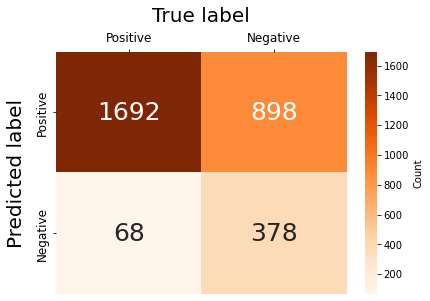

In [152]:
x_axis_labels = ['Positive', 'Negative']
y_axis_labels = ['Positive', 'Negative']
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_lr_smt_enn)), annot=True, annot_kws={"size": 25}, cmap="Oranges", fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels,
               cbar_kws={'label': 'Count'})
plt.ylabel('Predicted label', fontsize=20, labelpad=10)
plt.title('True label', fontsize=20, y=1.1, pad=10)
plt.yticks(va='center')
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = True, labeltop=True)

plt.savefig('Confusion Matrix LR high recall.png', bbox_inches='tight', dpi=150)

In [26]:
grid_log_reg.best_estimator_.coef_[0]

array([ 0.01989853,  0.24783932,  0.41764685,  1.00283553,  0.        ,
        0.71477621,  0.54996333,  0.62080569,  0.14449444, -0.24274808,
       -1.04004578, -1.20364443,  0.830606  ,  1.02045181,  0.90738731,
        1.37002636,  2.47907645,  1.3803707 , -0.70319855,  0.38150258,
       -2.60952049,  1.38921803,  0.97642397, -1.52175497,  0.49692039,
        0.59142916,  3.75362685, -0.05483932, -1.12189236, -0.56194713,
       -2.78457382,  0.82439078, -1.23523111, -0.91774059, -0.48397633,
        1.30041657,  6.51303011,  0.62175256,  0.26687998,  1.5494271 ,
       -0.41459668, -0.27083735, -2.32607692,  0.19460309,  0.94423647,
        2.04058367,  0.07748496,  0.07532275, -0.1040546 , -0.05829714,
        0.34769476,  0.06929584,  0.37117706,  0.17880926,  0.01306719,
        0.03594162])

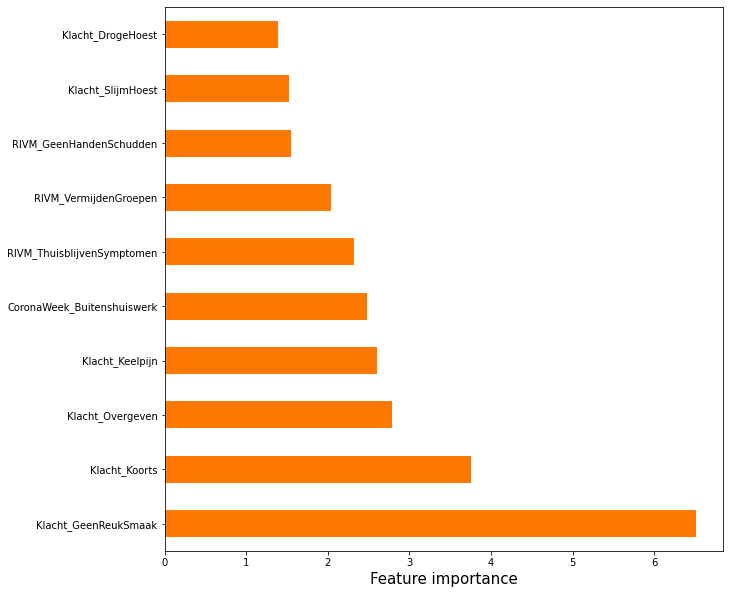

In [42]:
#pd.Series(abs(model.coef_[0]), index=X_names.columns).nlargest(15).plot(kind='barh')

(pd.Series(abs(grid_log_reg.best_estimator_.coef_[0]), index=X_names.columns)
   .nlargest(10)
   .plot(kind='barh', figsize=(10,10), color =['#ff7900']))

plt.xlabel('Feature importance', fontsize=15)

#import tikzplotlib as tikz
#tikz.save("Feature Importance LR SMOTE+ENN.tex")

#plt.savefig('Feature importance LR SMOTE&ENN.png', bbox_inches='tight', dpi=150)

# Make a DataFrame of the Feature Importances for the LR datasets
For comparison reasons only

In [395]:
feature_importance = pd.DataFrame({'Column names': X_names.columns,
                            'LR_Original': np.concatenate(importance_lr),
                           'LR_Tomek Links': np.concatenate(importance_lr_tl),
                            'LR_ENN': np.concatenate(importance_lr_enn),
                           'LR_SMOTE': np.concatenate(importance_lr_smt),
                            'LR_ADASYN': np.concatenate(importance_lr_ada),
                            'LR_SMOTE + Tomek Links': np.concatenate(importance_lr_smt_tl),
                           'LR_SMOTE + ENN': np.concatenate(importance_lr_smt_enn),
                           })

In [398]:
feature_importance[:10]

,Column names,LR_Original,LR_Tomek Links,LR_ENN,LR_SMOTE,LR_ADASYN,LR_SMOTE + Tomek Links,LR_SMOTE + ENN
0,Geslacht,-0.011871,-0.016736,-0.022803,-0.005022,0.019778,0.020441,-0.020100
1,Leeftijd,0.037688,0.034917,0.018795,0.032144,0.069599,0.106383,0.047750
2,Woonplaats,0.097416,0.100899,0.094936,0.107731,0.130579,0.127958,0.095109
3,Huishouden,0.179604,0.193874,0.177133,0.214471,0.197526,0.213597,0.197036
4,ThuiswonendeKinderen_0-3,-0.059678,-0.071290,-0.071902,-0.073801,-0.077817,-0.075821,-0.018078
5,ThuiswonendeKinderen_4-12,-0.027101,-0.025031,-0.020523,-0.045559,-0.049671,-0.026135,0.000000
6,ThuiswonendeKinderen_13-17,-0.005185,-0.015187,-0.017048,-0.059294,-0.024450,-0.033739,-0.059897
7,ThuiswonendeKinderen_18+,0.062239,0.057231,0.090160,0.019467,0.025627,-0.011933,0.000000
8,HoogsteOpleiding,-0.012173,-0.012934,-0.004903,0.009973,0.013166,0.007032,-0.002424
9,CruciaalBeroep,-0.046426,-0.060150,-0.028005,-0.098411,-0.085087,-0.098591,0.008959


# Stacked barplot

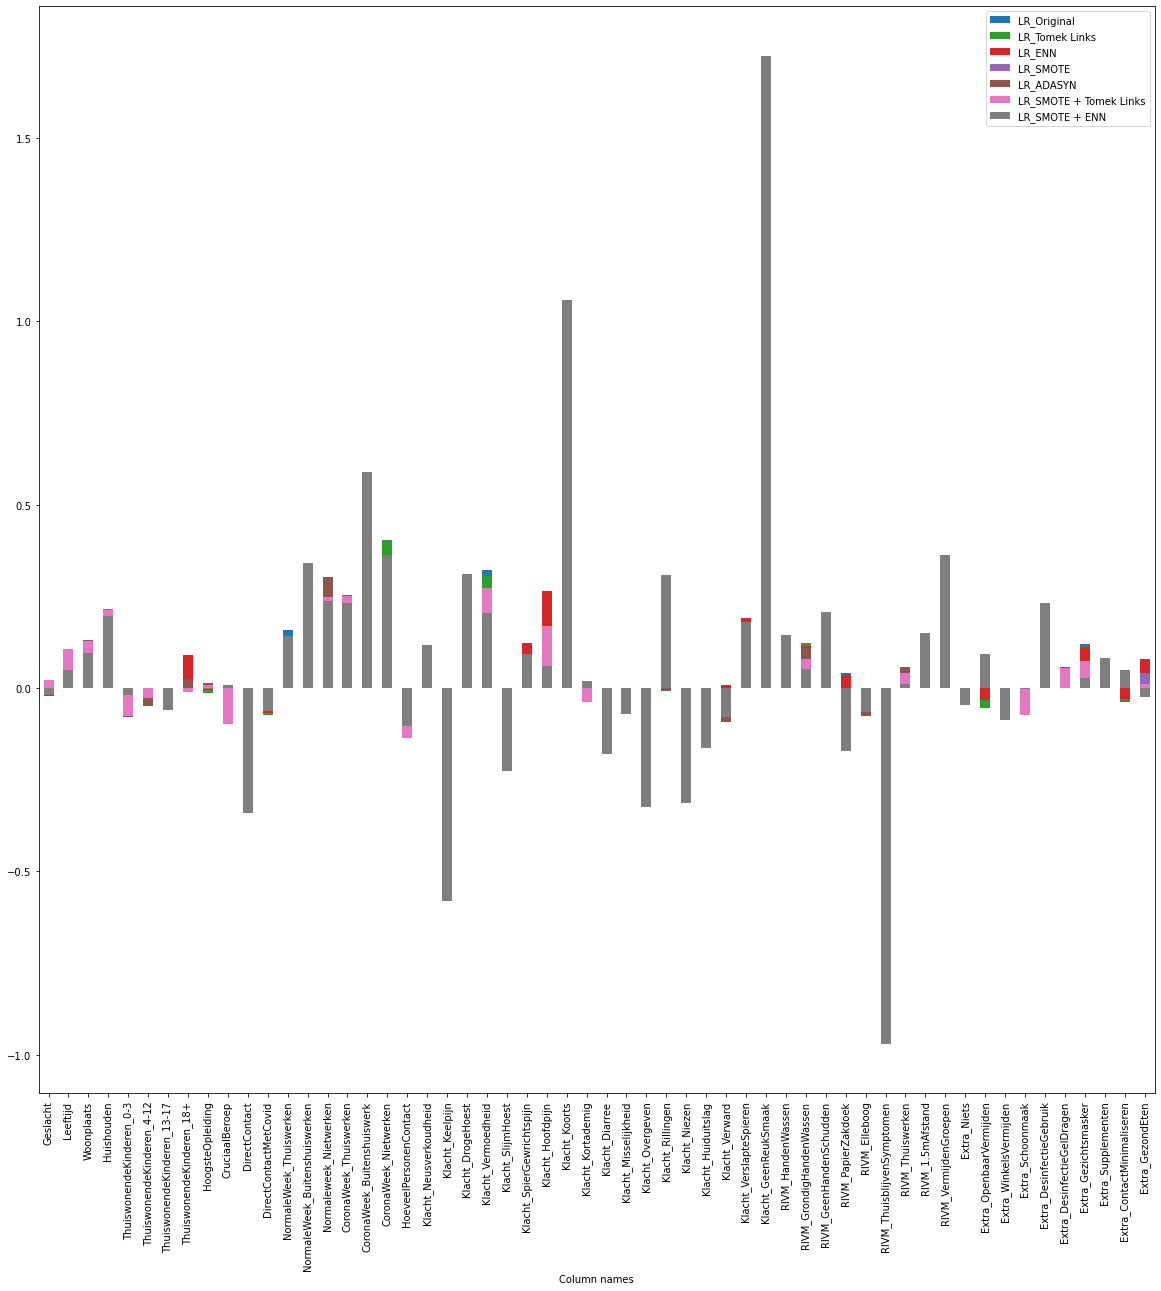

In [409]:
ax = feature_importance.plot(x="Column names", y = 'LR_Original', kind='bar', figsize=(20,20))
feature_importance.plot(x='Column names', y = 'LR_Tomek Links', kind='bar', ax=ax, color='C2')
feature_importance.plot(x='Column names', y = 'LR_ENN', kind='bar', ax=ax, color='C3')
feature_importance.plot(x='Column names', y = 'LR_SMOTE', kind='bar', ax=ax, color='C4')
feature_importance.plot(x='Column names', y = 'LR_ADASYN', kind='bar', ax=ax, color='C5')
feature_importance.plot(x='Column names', y = 'LR_SMOTE + Tomek Links', kind='bar', ax=ax, color='C6')
feature_importance.plot(x='Column names', y = 'LR_SMOTE + ENN', kind='bar', ax=ax, color='C7')


# Barplot with bars per dataset
These two plots are not used in the study, as they are quite large and unreadable

Text(0.5, 1.0, 'Feature Importance for the LR models')

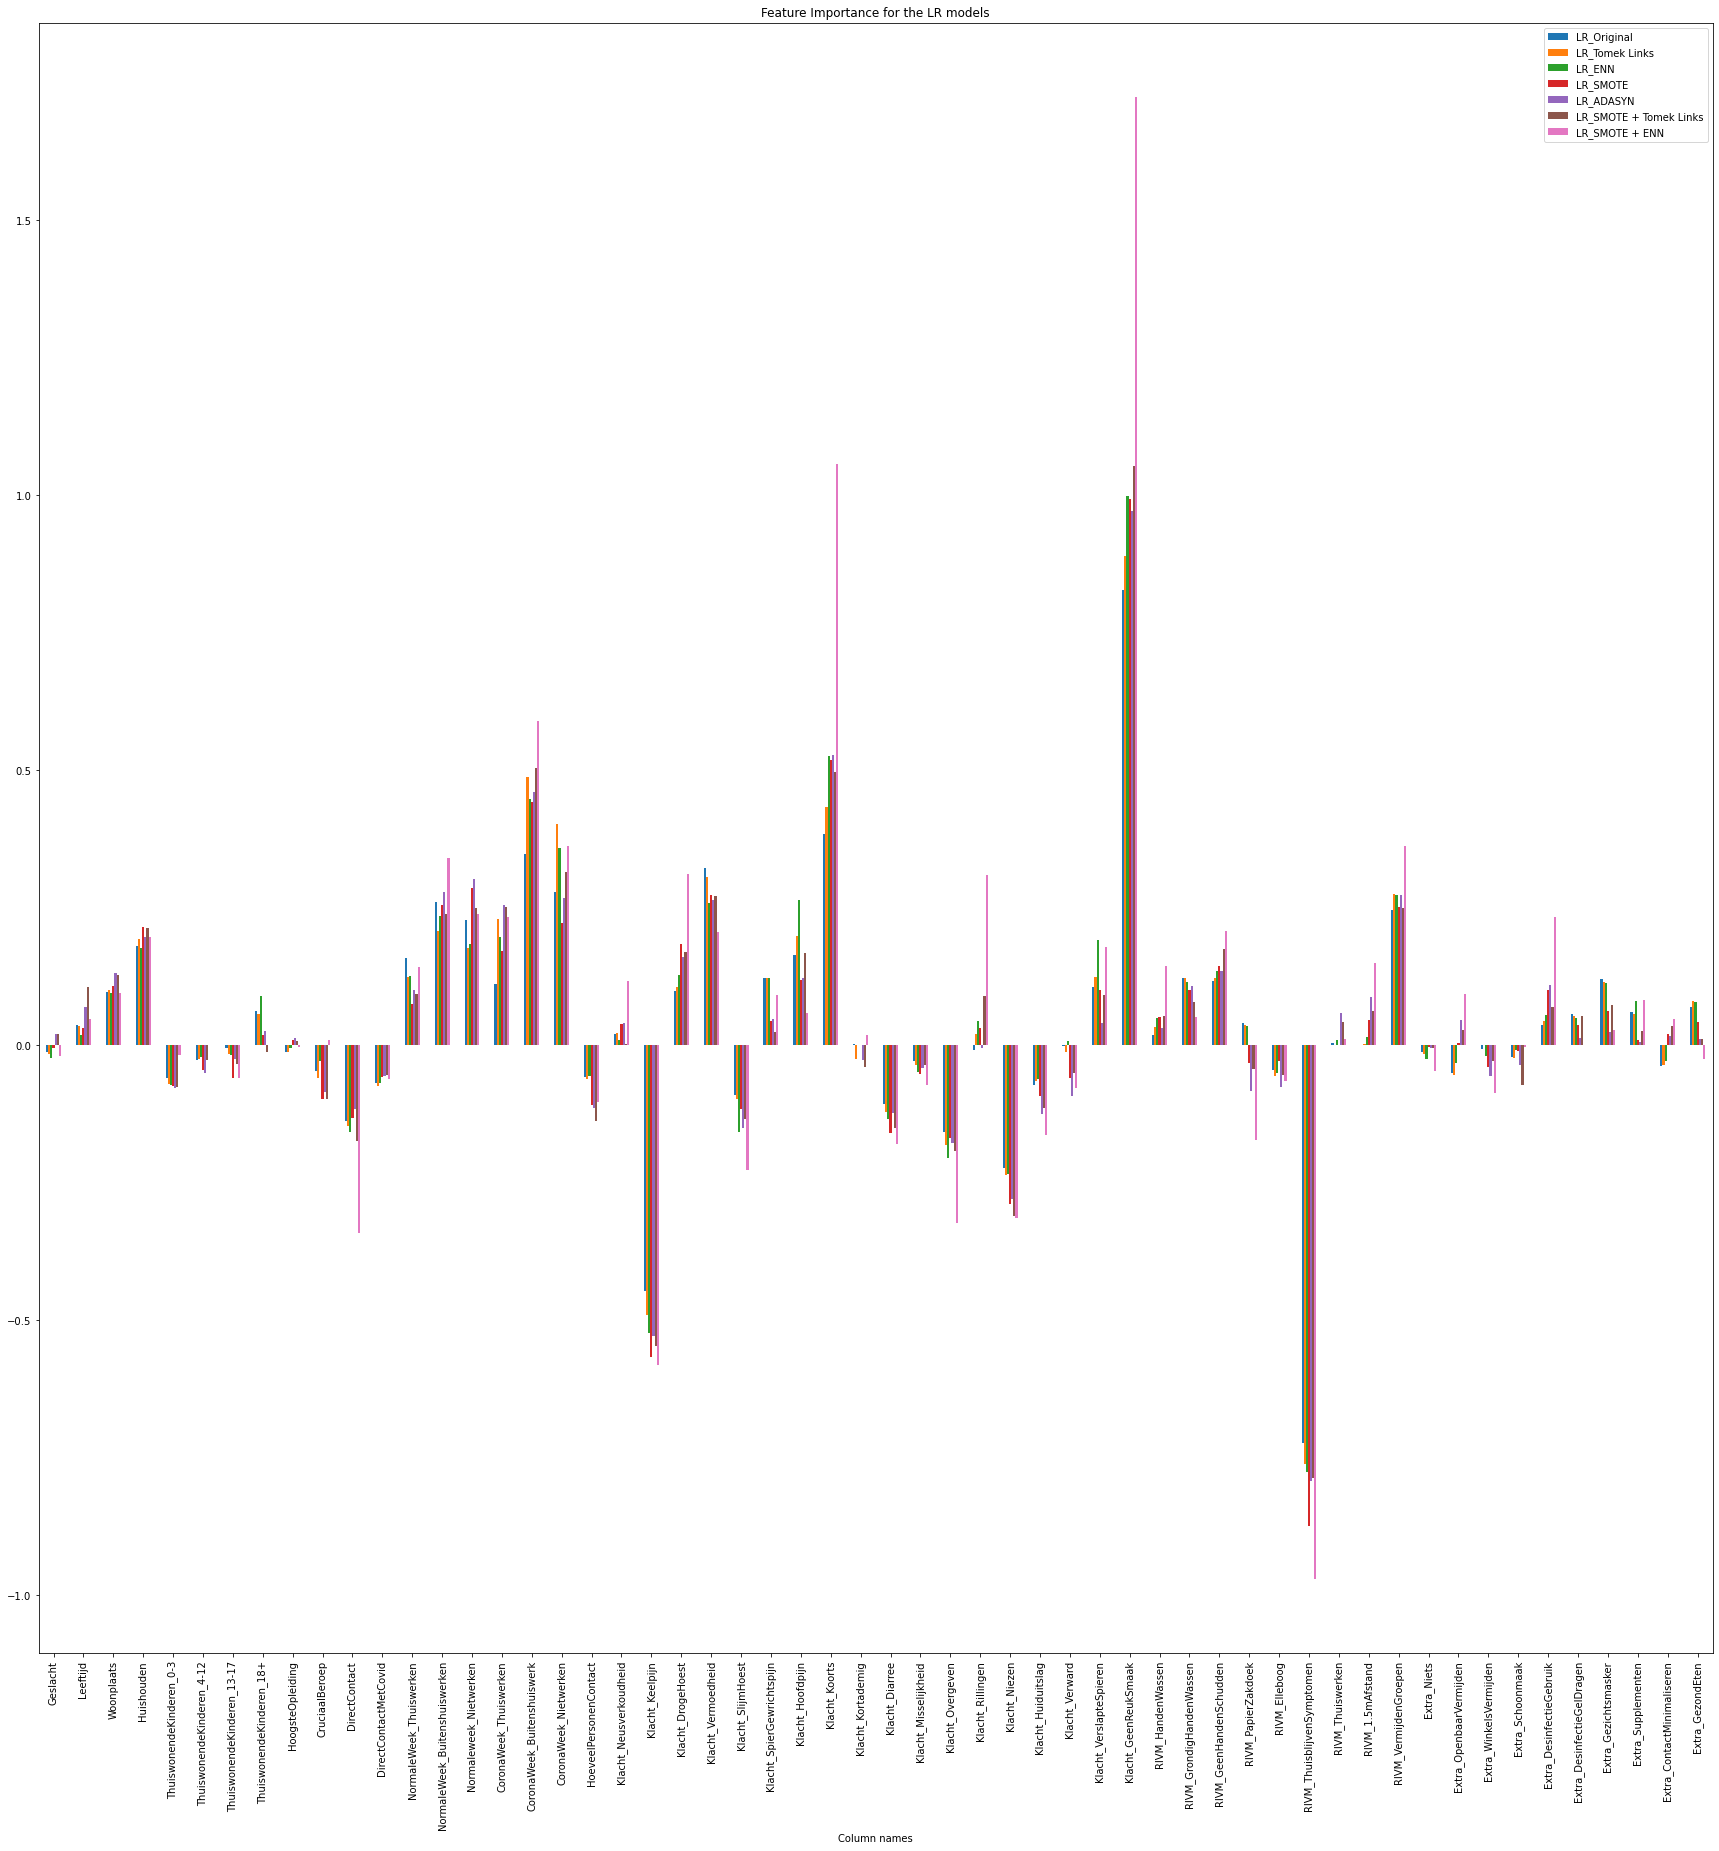

In [403]:
feature_importance.plot(x='Column names', y = ['LR_Original', 'LR_Tomek Links', 'LR_ENN', 'LR_SMOTE',
       'LR_ADASYN', 'LR_SMOTE + Tomek Links', 'LR_SMOTE + ENN'], kind='bar', figsize=(30,30))

plt.title('Feature Importance for the LR models')

# Visualisation of the Precision-Recall Curve

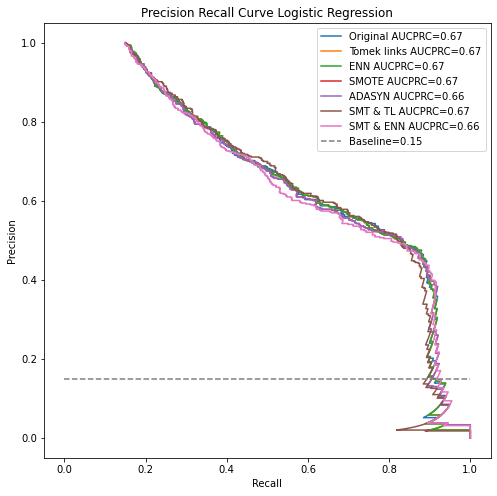

In [316]:
plt.figure(figsize=(8,8))

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_lr)
plt.plot(precision, recall, label='Original AUCPRC='+ str((metrics.average_precision_score(y_test,y_prob_lr)).round(2)))

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_lr_tl)
plt.plot(precision, recall, label='Tomek links AUCPRC='+ str((metrics.average_precision_score(y_test,y_prob_lr_tl)).round(2)))
         
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_lr_tl)
plt.plot(precision, recall, label='ENN AUCPRC='+ str((metrics.average_precision_score(y_test,y_prob_lr_enn1)).round(2)))

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_lr_smt)
plt.plot(precision, recall, label='SMOTE AUCPRC='+ str((metrics.average_precision_score(y_test,y_prob_lr_smt)).round(2)))
         
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_lr_smt)
plt.plot(precision, recall, label='ADASYN AUCPRC='+ str((metrics.average_precision_score(y_test,y_prob_lr_ada)).round(2)))

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_lr_smt_enn)
plt.plot(precision, recall, label='SMT & TL AUCPRC='+ str((metrics.average_precision_score(y_test,y_prob_lr_smt_enn)).round(2)))

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_lr_smt_tl)
plt.plot(precision, recall, label='SMT & ENN AUCPRC='+ str((metrics.average_precision_score(y_test,y_prob_lr_smt_tl)).round(2)))

x_cor = [0,1]
y_cor = [0.15,0.15]

plt.plot(x_cor,y_cor, linestyle='--', label='Baseline=0.15')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='upper right')
plt.title('Precision Recall Curve Logistic Regression')
plt.savefig('Logistic Regression: PRC(AUC).png', bbox_inches='tight', dpi=150)
plt.show()

# Model 2. Random Forest

## 2.1 Original

In [411]:
#parameters of the model
rf_params = { 
    'n_estimators': [200, 500, 700],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,8,12,16],
    'bootstrap': [True, False]
},

#fit to the Grid Search CV
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, refit=True, verbose=1, n_jobs=-1, cv=3, scoring='f1')
grid_rf.fit(X_train,y_train)

#predict and print results
y_pred_rf = grid_rf.predict(X_test)
y_prob_rf = grid_rf.predict_proba(X_test)[:,1]

#Find the Feature Importance
importance_rf = grid_rf.best_estimator_.feature_importances_

#Print the best estimators
print('Best estimators for this model:', grid_rf.best_estimator_)

print_results('Vanilla Random Forest', y_test, y_pred_rf, y_prob_rf)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best estimators for this model: LogisticRegression(C=1, max_iter=100000, penalty='l1', solver='saga')
Vanilla Random Forest

Confusion Matrix:
[[2564   26]
 [ 253  193]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2590
           1       0.88      0.43      0.58       446

    accuracy                           0.91      3036
   macro avg       0.90      0.71      0.76      3036
weighted avg       0.91      0.91      0.89      3036

accuracy: 0.908
precision: 0.881
recall: 0.433
F1: 0.58
AUC(PRC), average precision: 0.69


## 2.2 (u) Tomek Links

In [261]:
#model parameters
rf_params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,8],
    'bootstrap': [True, False]
},

#fit to the Grid Search CV
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, refit=True, verbose=1, n_jobs=-1, cv=3, scoring='f1')
grid_rf.fit(X_train_tl,y_train_tl)

#predict and print results
y_pred_rf_tl = grid_rf.predict(X_test)
y_prob_rf_tl = grid_rf.predict_proba(X_test)[:,1]

#Feature Importance
importance_rf_tl = grid_rf.best_estimator_.feature_importances_

#Print the best estimators
print('Best estimators for this model:', grid_rf.best_estimator_)

#Print the results
print_results('Tomek Links, Random Forest', y_test, y_pred_rf_tl, y_prob_rf_tl)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Tomek Links, Random Forest

Confusion Matrix:
[[2564   26]
 [ 250  196]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2590
           1       0.88      0.44      0.59       446

    accuracy                           0.91      3036
   macro avg       0.90      0.71      0.77      3036
weighted avg       0.91      0.91      0.90      3036

accuracy: 0.909
precision: 0.883
recall: 0.439
F1: 0.587
AUC: 0.715


## 2.3. (u) Edited Nearest Neighbors

In [416]:
rf_params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,8],
    'bootstrap': [True, False]
},

#fit to the Grid Search CV
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, refit=True, verbose=1, n_jobs=-1, cv=3, scoring='f1')
grid_rf.fit(X_train_enn1,y_train_enn1)

importance_rf_enn = grid_rf.best_estimator_.feature_importances_
y_prob_rf_enn1 = grid_rf.predict_proba(X_test)[:,1]

y_pred_rf_enn1 = grid_rf.predict(X_test)
print_results("RF ENN 1", y_test, y_pred_rf_enn1, y_prob_rf_enn1)



Fitting 3 folds for each of 24 candidates, totalling 72 fits
RF ENN 1

Confusion Matrix:
[[2555   35]
 [ 244  202]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2590
           1       0.85      0.45      0.59       446

    accuracy                           0.91      3036
   macro avg       0.88      0.72      0.77      3036
weighted avg       0.90      0.91      0.90      3036

accuracy: 0.908
precision: 0.852
recall: 0.453
F1: 0.592
AUC(PRC), average precision: 0.67


In [271]:
auprc_rf_enn1 = metrics.average_precision_score(y_test, y_prob_rf_enn1)
print(auprc_rf_enn1.round(2))

0.67


## 2.4 (o) SMOTE

In [263]:
rf_params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,8],
    'bootstrap': [True, False]
},

#fit to the Grid Search CV
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, refit=True, verbose=1, n_jobs=-1, cv=3, scoring='f1')
grid_rf.fit(X_train_smt,y_train_smt)

#predict and print results
y_pred_rf_smt = grid_rf.predict(X_test)
y_prob_rf_smt = grid_rf.predict_proba(X_test)[:,1]
importance_rf_smt = grid_rf.best_estimator_.feature_importances_


print_results('SMOTE, Random Forest', y_test, y_pred_rf_smt)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
SMOTE, Random Forest

Confusion Matrix:
[[2468  122]
 [ 182  264]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2590
           1       0.68      0.59      0.63       446

    accuracy                           0.90      3036
   macro avg       0.81      0.77      0.79      3036
weighted avg       0.89      0.90      0.90      3036

accuracy: 0.9
precision: 0.684
recall: 0.592
F1: 0.635
AUC: 0.772


## 2.5 (o) ADASYN

In [264]:
log_reg_params = {"solver": ['saga'],
                  "penalty": ['l1', 'l2'], 
                  'C':  [0.01, 0.1, 1, 10, 100], 
                  "max_iter" : [100000]},

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=5, verbose=1, scoring='f1')
grid_log_reg.fit(X_train_ada,y_train_ada)


y_pred_lr_ada = grid_log_reg.predict(X_test)
print_results("LR ADASYN", y_test, y_pred_lr_ada)

y_prob_lr_ada = grid_log_reg.predict_proba(X_test)[:,1]
importance_rf_ada = grid_rf.best_estimator_.feature_importances_


Fitting 5 folds for each of 10 candidates, totalling 50 fits
LR ADASYN

Confusion Matrix:
[[1998  592]
 [ 111  335]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      2590
           1       0.36      0.75      0.49       446

    accuracy                           0.77      3036
   macro avg       0.65      0.76      0.67      3036
weighted avg       0.86      0.77      0.80      3036

accuracy: 0.768
precision: 0.361
recall: 0.751
F1: 0.488
AUC: 0.761


## 2.6. (c) SMOTE + Tomek Links

In [265]:
rf_params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,8],
    'bootstrap': [True, False]
},

#fit to the Grid Search CV
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, refit=True, verbose=1, n_jobs=-1, cv=3, scoring='f1')
grid_rf.fit(X_train_smt_tl,y_train_smt_tl)

#predict and print results
y_pred_rf_smt_tl = grid_rf.predict(X_test)
y_prob_rf_smt_tl = grid_rf.predict_proba(X_test)[:,1]
importance_rf_smt_tl = grid_rf.best_estimator_.feature_importances_


print_results('SMOTE + TL, Random Forest', y_test, y_pred_rf_smt_tl)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
SMOTE + TL, Random Forest

Confusion Matrix:
[[2468  122]
 [ 187  259]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2590
           1       0.68      0.58      0.63       446

    accuracy                           0.90      3036
   macro avg       0.80      0.77      0.78      3036
weighted avg       0.89      0.90      0.89      3036

accuracy: 0.898
precision: 0.68
recall: 0.581
F1: 0.626
AUC: 0.767


## 2.7. (c) SMOTE + ENN

In [266]:
rf_params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,8],
    'bootstrap': [True, False]
},

#fit to the Grid Search CV
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, refit=True, verbose=1, n_jobs=-1, cv=3, scoring='f1')
grid_rf.fit(X_train_smt_enn,y_train_smt_enn)

#predict and print results
y_pred_rf_smt_enn = grid_rf.predict(X_test)
y_prob_rf_smt_enn = grid_rf.predict_proba(X_test)[:,1]
importance_rf_smt_enn = grid_rf.best_estimator_.feature_importances_


print_results('SMOTE + ENN, Random Forest', y_test, y_pred_rf_smt_enn)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
SMOTE + ENN, Random Forest

Confusion Matrix:
[[1914  676]
 [  89  357]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.74      0.83      2590
           1       0.35      0.80      0.48       446

    accuracy                           0.75      3036
   macro avg       0.65      0.77      0.66      3036
weighted avg       0.87      0.75      0.78      3036

accuracy: 0.748
precision: 0.346
recall: 0.8
F1: 0.483
AUC: 0.77


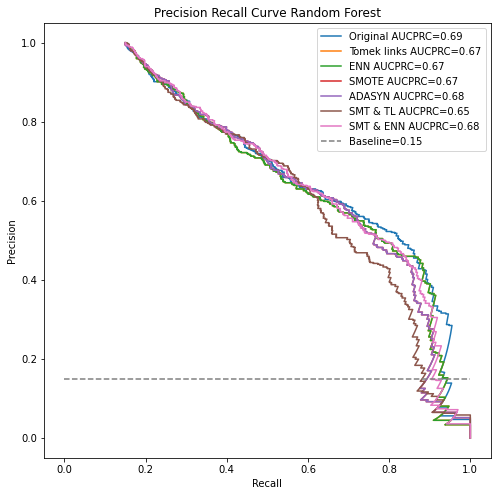

In [315]:
plt.figure(figsize=(8,8))

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_rf)
plt.plot(precision, recall, label='Original AUCPRC='+ str((metrics.average_precision_score(y_test,y_prob_rf)).round(2)))

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_rf_tl)
plt.plot(precision, recall, label='Tomek links AUCPRC='+ str((metrics.average_precision_score(y_test,y_prob_rf_tl)).round(2)))
         
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_rf_tl)
plt.plot(precision, recall, label='ENN AUCPRC='+ str((metrics.average_precision_score(y_test,y_prob_rf_enn1)).round(2)))

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_rf_smt)
plt.plot(precision, recall, label='SMOTE AUCPRC='+ str((metrics.average_precision_score(y_test,y_prob_rf_smt)).round(2)))
         
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_rf_smt)
plt.plot(precision, recall, label='ADASYN AUCPRC='+ str((metrics.average_precision_score(y_test,y_prob_rf_ada)).round(2)))

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_rf_smt_enn)
plt.plot(precision, recall, label='SMT & TL AUCPRC='+ str((metrics.average_precision_score(y_test,y_prob_rf_smt_enn)).round(2)))

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_rf_smt_tl)
plt.plot(precision, recall, label='SMT & ENN AUCPRC='+ str((metrics.average_precision_score(y_test,y_prob_rf_smt_tl)).round(2)))

x_cor = [0,1]
y_cor = [0.15,0.15]

plt.plot(x_cor,y_cor, linestyle='--', label='Baseline=0.15')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='upper right')
plt.title('Precision Recall Curve Random Forest')
plt.savefig('Random Forest: PRC(AUC).png', bbox_inches='tight', dpi=150)
plt.show()

# Feature Importance for the RF models

In [417]:
feature_importance_rf = pd.DataFrame({'Column names': X_names.columns,
                            'RF_Original': importance_rf,
                           'RF_Tomek Links': importance_rf_tl,
                            'RF_ENN': importance_rf_enn,
                           'RF_SMOTE': importance_rf_smt,
                            'RF_ADASYN': importance_rf_ada,
                            'RF_SMOTE + Tomek Links': importance_rf_smt_tl,
                           'RF_SMOTE + ENN': importance_rf_smt_enn,
                           })

In [428]:
#make a new column for the rf feature importance dataframe
feature_importance_rf['sum'] = feature_importance_rf[['RF_Original', 'RF_Tomek Links', 'RF_ENN', 'RF_SMOTE',
       'RF_ADASYN', 'RF_SMOTE + Tomek Links', 'RF_SMOTE + ENN']].sum(axis=1)

In [429]:
feature_importance_rf[:10]

,Column names,RF_Original,RF_Tomek Links,RF_ENN,RF_SMOTE,RF_ADASYN,RF_SMOTE + Tomek Links,RF_SMOTE + ENN,sum
0,Geslacht,0.007240,0.002588,0.002232,0.009110,0.009110,0.008677,0.011623,0.050581
1,Leeftijd,0.042089,0.023186,0.016848,0.008608,0.008608,0.006451,0.012462,0.118251
2,Woonplaats,0.042593,0.020192,0.011288,0.004977,0.004977,0.005131,0.008386,0.097544
3,Huishouden,0.017775,0.009847,0.006352,0.012381,0.012381,0.008103,0.010821,0.077660
4,ThuiswonendeKinderen_0-3,0.002822,0.001760,0.001490,0.000682,0.000682,0.000589,0.000800,0.008825
5,ThuiswonendeKinderen_4-12,0.006251,0.003543,0.002602,0.001196,0.001196,0.001279,0.001625,0.017692
6,ThuiswonendeKinderen_13-17,0.008479,0.004108,0.002546,0.002251,0.002251,0.001646,0.002224,0.023507
7,ThuiswonendeKinderen_18+,0.011069,0.005659,0.005284,0.003679,0.003679,0.003644,0.004019,0.037033
8,HoogsteOpleiding,0.015196,0.005789,0.003469,0.006455,0.006455,0.011083,0.010034,0.058481
9,CruciaalBeroep,0.014957,0.006945,0.003895,0.011960,0.011960,0.014042,0.021964,0.085722


## Barplot for the Feature Importance of the RF model

Text(0.5, 1.0, 'Feature Importance for the RF models')

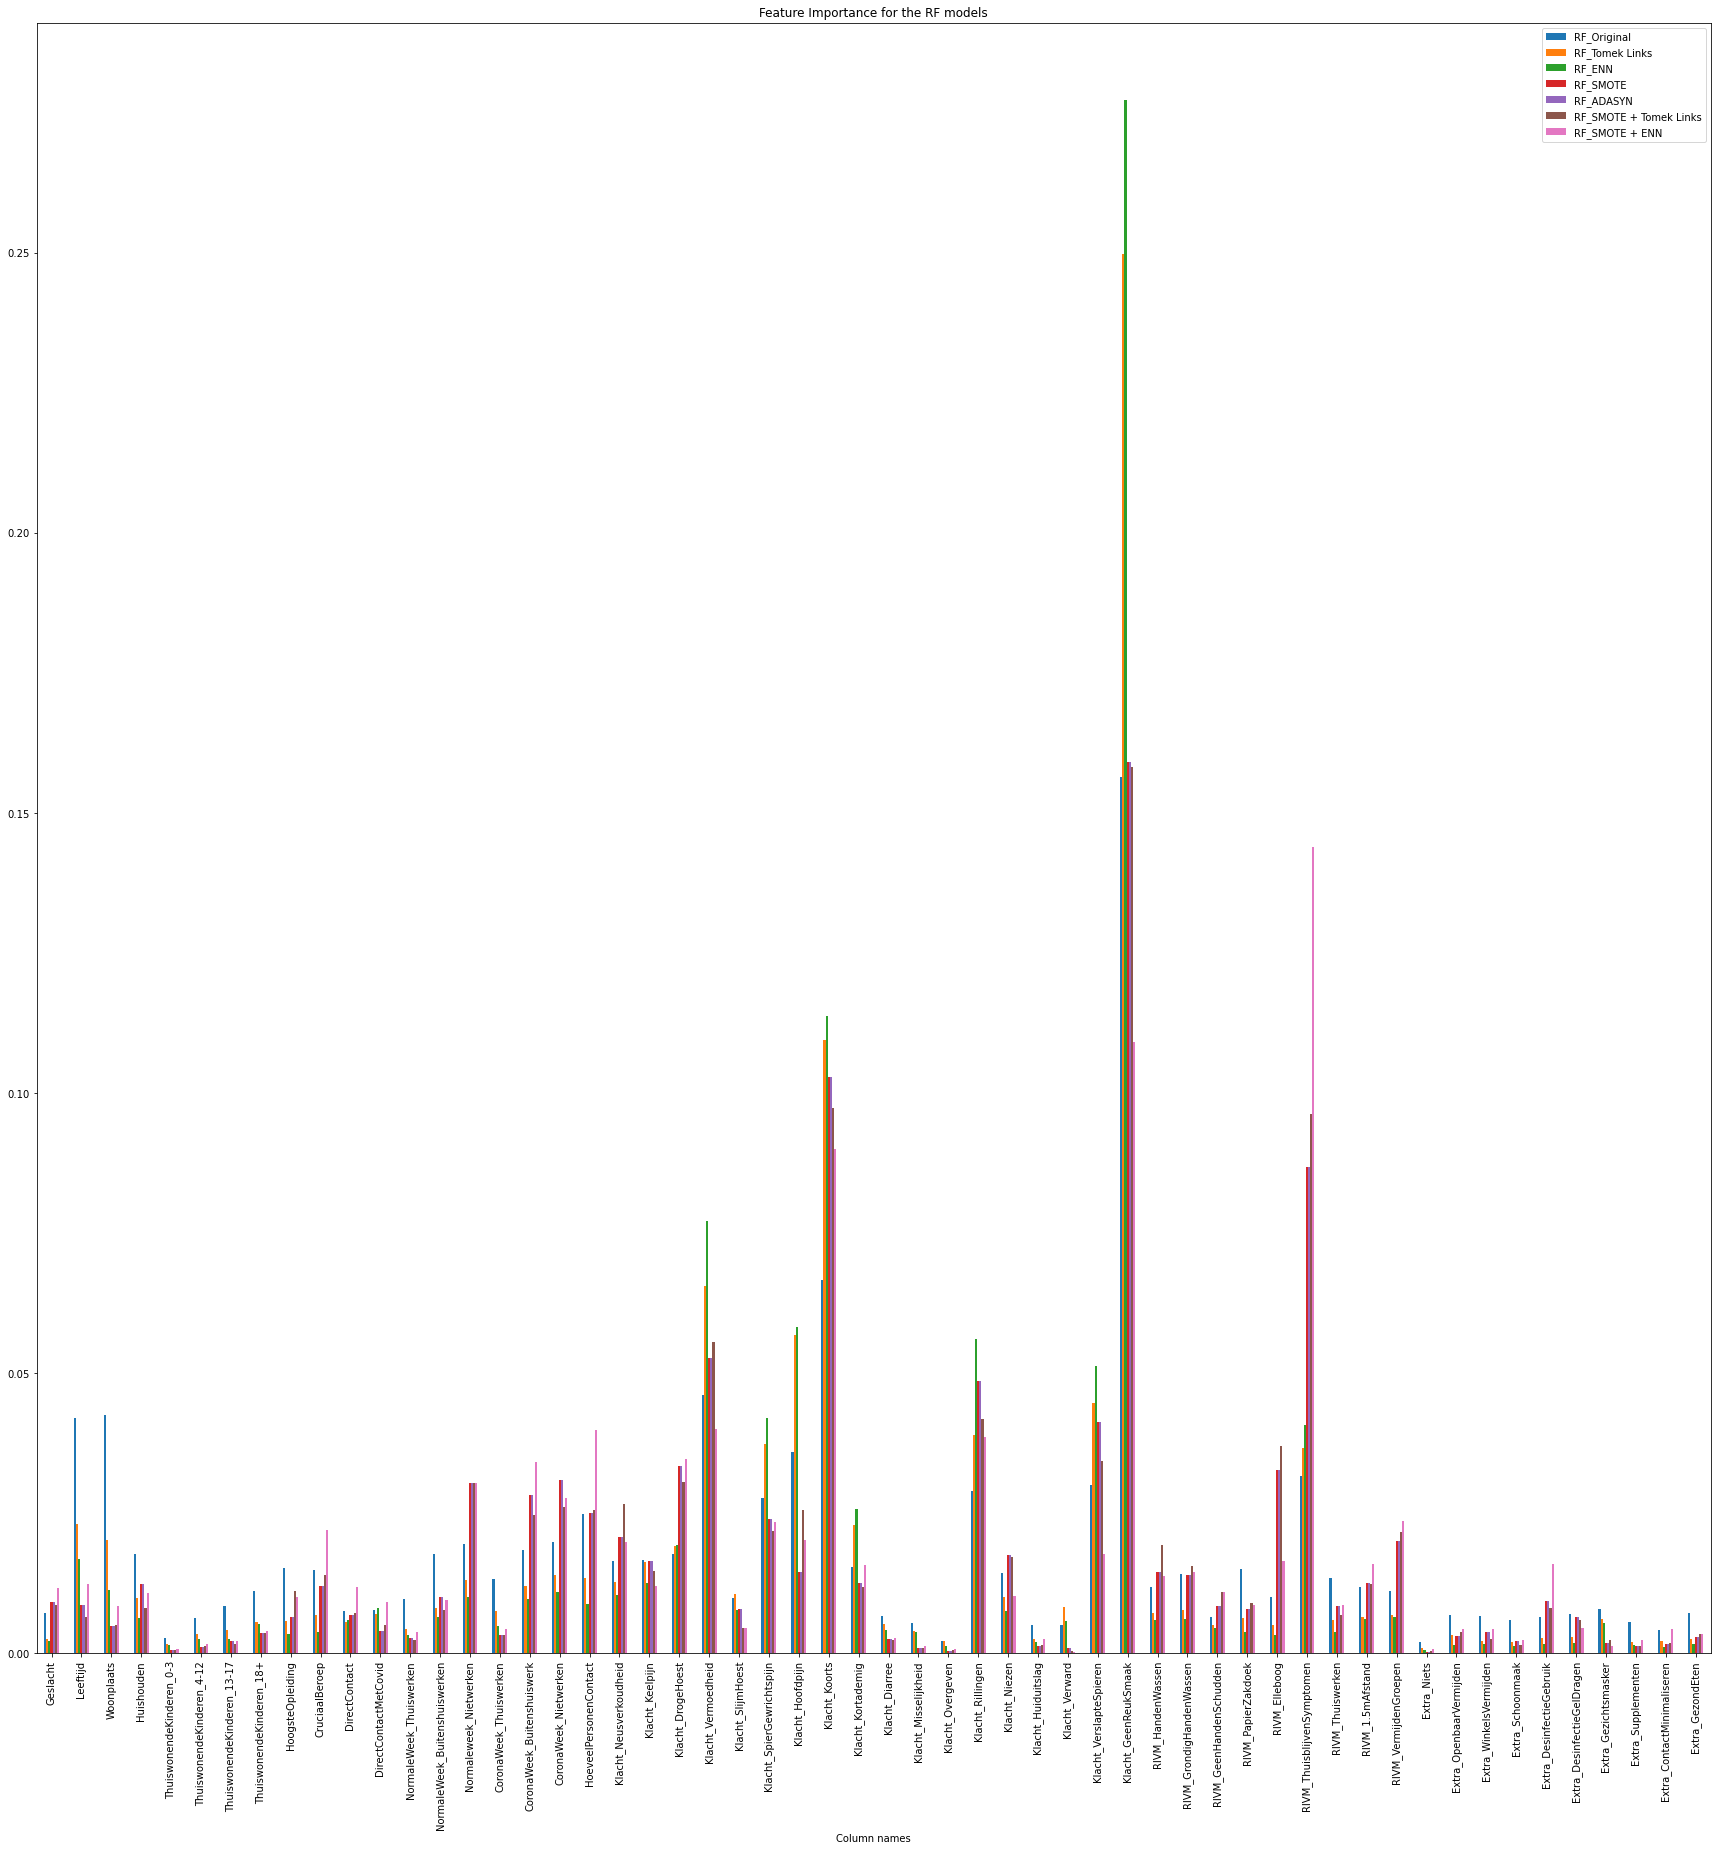

In [418]:
feature_importance_rf.plot(x='Column names', y = ['RF_Original', 'RF_Tomek Links', 'RF_ENN', 'RF_SMOTE',
       'RF_ADASYN', 'RF_SMOTE + Tomek Links', 'RF_SMOTE + ENN'], kind='bar', figsize=(30,30))

plt.title('Feature Importance for the RF models')

# Model 3. Support Vector Machine

## Original

In [29]:
svm_params = {
              'kernel': ['rbf', 'linear', 'poly'],
            'C': [0.001, 0.01, 0.1, 1],
            'gamma':[0.001, 0.01, 0.1, 1]} 

#fit to the Grid Search CV
grid_svm = GridSearchCV(SVC(probability=True), svm_params, refit=True, verbose=1, n_jobs=-1, cv=3, scoring='f1')
grid_svm.fit(X_train,y_train)

#predict and print results
y_pred_svm = grid_svm.predict(X_test)
y_prob_svm = grid_svm.predict_proba(X_test)[:,1]

#feature importance
#importance_svm = grid_svm.best_estimator_.feature_importances_

#print the best parameter
#print(grid_.best_estimator_)

#print the results
print_results('Vanilla SVM', y_test, y_pred_svm, y_prob_svm)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Vanilla SVM

Confusion Matrix:
[[2567   23]
 [ 264  182]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2590
           1       0.89      0.41      0.56       446

    accuracy                           0.91      3036
   macro avg       0.90      0.70      0.75      3036
weighted avg       0.90      0.91      0.89      3036

accuracy: 0.905
precision: 0.888
recall: 0.408
F1: 0.559
AUC(PRC), average precision: 0.65


In [422]:
grid_svm.best_estimator_

SVC(kernel='linear', probability=True)

In [56]:
#Fit the model without the GridSearch to find the Feature Importance
model = SVC(probability=True, kernel='linear')
model.fit(X_train,y_train)
y_pred_svm_nogrid = model.predict(X_test)
y_prob_svm_nogrid = model.predict_proba(X_test)[:,1]
print_results('No Grid Vanilla SVM', y_test, y_pred_svm_nogrid, y_prob_svm_nogrid)

No Grid Vanilla SVM

Confusion Matrix:
[[2569   21]
 [ 260  186]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2590
           1       0.90      0.42      0.57       446

    accuracy                           0.91      3036
   macro avg       0.90      0.70      0.76      3036
weighted avg       0.91      0.91      0.89      3036

accuracy: 0.907
precision: 0.899
recall: 0.417
F1: 0.57
AUC(PRC), average precision: 0.67


In [57]:
model.coef_

array([[ 7.67844013e-05,  1.08750526e-02,  9.68274432e-03,
         2.11401550e-02, -1.05707586e-02, -5.30637706e-03,
        -6.55473173e-03,  8.12927341e-03, -6.83913904e-04,
        -3.84051107e-03, -1.46232015e-02, -8.46505207e-03,
         1.31967776e-02,  3.40509608e-02,  3.98990463e-02,
         9.11089041e-02,  1.11819974e-01,  1.10926143e-01,
        -7.13464557e-03, -1.50710318e-02, -2.23534896e-01,
         4.12140870e-02,  7.97332187e-02, -5.68542137e-02,
         2.40882041e-02,  7.14342058e-02,  1.99441403e-01,
         1.66747403e-02, -4.08439594e-02, -8.08813809e-03,
        -8.25245000e-02,  1.68425338e-02, -9.71083742e-02,
        -5.73741258e-02,  6.47092756e-03,  6.67550308e-02,
         5.22260174e-01,  1.34096381e-03,  2.15688689e-02,
         6.38307215e-03,  5.15041360e-03, -7.78709057e-03,
        -9.21536142e-02, -2.62269525e-03, -5.55260835e-03,
         3.20955628e-02, -2.39662858e-03, -4.92700162e-03,
        -1.59467586e-03, -7.45024176e-03,  2.79054281e-0

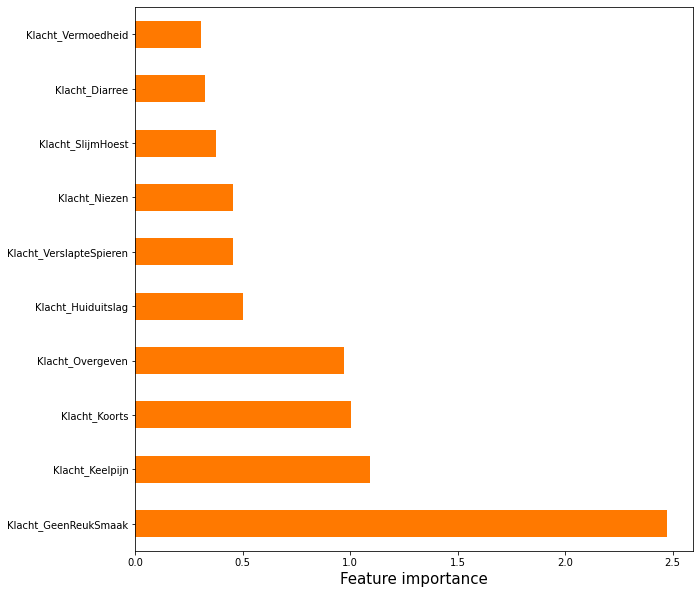

In [43]:
#pd.Series(abs(model.coef_[0]), index=X_names.columns).nlargest(15).plot(kind='barh')

(pd.Series(abs(model.coef_[0]), index=X_names.columns)
   .nlargest(10)
   .plot(kind='barh', figsize=(10,10), color =['#ff7900']))

plt.xlabel('Feature importance', fontsize=15)

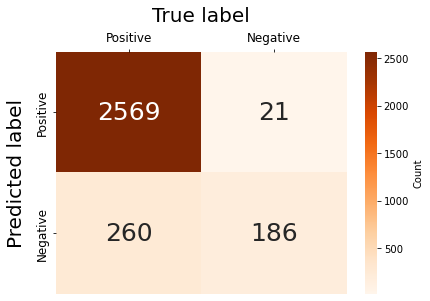

In [104]:
x_axis_labels = ['Positive', 'Negative']
y_axis_labels = ['Positive', 'Negative']
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_svm)), annot=True, annot_kws={"size": 25}, cmap="Oranges", fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels,
               cbar_kws={'label': 'Count'})
plt.ylabel('Predicted label', fontsize=20, labelpad=10)
plt.title('True label', fontsize=20, y=1.1, pad=10)
plt.yticks(va='center')
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = True, labeltop=True)

plt.savefig('Confusion Matrix SVM high precision.png', bbox_inches='tight', dpi=150)

## 3.2. (u) Tomek Links

In [280]:
#model parameters
svm_params = {
              'kernel': ['rbf', 'linear', 'poly'],
            'C': [0.001, 0.01, 0.1, 1],
            'gamma':[0.001, 0.01, 0.1, 1]} 

#fit to the Grid Search CV
grid_svm = GridSearchCV(SVC(probability=True), svm_params, refit=True, verbose=1, n_jobs=-1, cv=3, scoring='f1')
grid_svm.fit(X_train_tl,y_train_tl)

#predict and print results
y_pred_svm_tl = grid_svm.predict(X_test)
y_prob_svm_tl = grid_svm.predict_proba(X_test)[:,1]

#feature importance
#importance_svm_tl = grid_svm.best_estimator_.feature_importances_

#print the best parameter
print(grid_rf.best_estimator_)

#print results
print_results('Tomek Links SVM', y_test, y_pred_svm_tl, y_prob_svm_tl)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Tomek Links SVM

Confusion Matrix:
[[2569   21]
 [ 254  192]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2590
           1       0.90      0.43      0.58       446

    accuracy                           0.91      3036
   macro avg       0.91      0.71      0.77      3036
weighted avg       0.91      0.91      0.90      3036

accuracy: 0.909
precision: 0.901
recall: 0.43
F1: 0.583
AUC: 0.711


## 3.3 (u) ENN

In [104]:
svm_params = {
              'kernel': ['rbf', 'linear', 'poly'],
            'C': [0.001, 0.01, 0.1, 1],
            'gamma':[0.001, 0.01, 0.1, 1]} 

#fit to the Grid Search CV
grid_svm = GridSearchCV(SVC(probability=True), svm_params, refit=True, verbose=1, n_jobs=-1, cv=3, scoring='f1')
grid_svm.fit(X_train_enn,y_train_enn)

#predict and print results
y_pred_svm_enn = grid_svm.predict(X_test)
y_prob_svm_enn = grid_svm.predict_proba(X_test)[:,1]

#print the best parameter
print(grid_svm.best_estimator_)

print_results('ENN (n=1) SVM', y_test, y_pred_svm_enn, y_prob_svm_enn)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
SVC(C=1, gamma=0.01, probability=True)
ENN (n=1) SVM

Confusion Matrix:
[[2554   36]
 [ 238  208]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2590
           1       0.85      0.47      0.60       446

    accuracy                           0.91      3036
   macro avg       0.88      0.73      0.78      3036
weighted avg       0.91      0.91      0.90      3036

accuracy: 0.91
precision: 0.852
recall: 0.466
F1: 0.603
AUC(PRC), average precision: 0.69


## 3.4. (o) SMOTE

In [287]:
#model parameters
svm_params = {
              'kernel': ['rbf', 'linear', 'poly'],
            'C': [0.001, 0.01, 0.1, 1],
            'gamma':[0.001, 0.01, 0.1, 1]} 

#fit to the Grid Search CV
grid_svm = GridSearchCV(SVC(probability=True), svm_params, refit=True, verbose=1, n_jobs=-1, cv=3, scoring='f1')
grid_svm.fit(X_train_smt,y_train_smt)

#predict and print results
y_pred_svm_smt = grid_svm.predict(X_test)
y_prob_svm_smt = grid_svm.predict_proba(X_test)[:,1]

#feature importance
importance_svm_smt = grid_svm.best_estimator_.feature_importances_

#print the best parameter
print(grid_rf.best_estimator_)

#print the results
print_results('Tomek Links SVM', y_test, y_pred_svm_smt, y_prob_svm_smt)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Tomek Links SVM

Confusion Matrix:
[[2365  225]
 [ 204  242]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2590
           1       0.52      0.54      0.53       446

    accuracy                           0.86      3036
   macro avg       0.72      0.73      0.72      3036
weighted avg       0.86      0.86      0.86      3036

accuracy: 0.859
precision: 0.518
recall: 0.543
F1: 0.53
AUC(PRC), average precision: 0.59


## 3.5 (o) ADASYN

In [288]:
svm_params = {
              'kernel': ['rbf', 'linear', 'poly'],
            'C': [0.001, 0.01, 0.1, 1],
            'gamma':[0.001, 0.01, 0.1, 1]} 

#fit to the Grid Search CV
grid_svm = GridSearchCV(SVC(probability=True), svm_params, refit=True, verbose=1, n_jobs=-1, cv=3, scoring='f1')
grid_svm.fit(X_train_ada,y_train_ada)

#predict and print results
y_pred_svm_ada = grid_svm.predict(X_test)
y_prob_svm_ada = grid_svm.predict_proba(X_test)[:,1]

print_results('ADASYN SVM', y_test, y_pred_svm_ada, y_prob_svm_ada)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
ADASYN SVM

Confusion Matrix:
[[2313  277]
 [ 194  252]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      2590
           1       0.48      0.57      0.52       446

    accuracy                           0.84      3036
   macro avg       0.70      0.73      0.71      3036
weighted avg       0.86      0.84      0.85      3036

accuracy: 0.845
precision: 0.476
recall: 0.565
F1: 0.517
AUC(PRC), average precision: 0.56


## 3.6. (c) SMOTE + Tomek Links

In [289]:
svm_params = {
              'kernel': ['rbf', 'linear', 'poly'],
            'C': [0.001, 0.01, 0.1, 1],
            'gamma':[0.001, 0.01, 0.1, 1]} 

#fit to the Grid Search CV
grid_svm = GridSearchCV(SVC(probability=True), svm_params, refit=True, verbose=1, n_jobs=-1, cv=3, scoring='f1')
grid_svm.fit(X_train_smt_tl,y_train_smt_tl)

#predict and print results
y_pred_svm_smt_tl = grid_svm.predict(X_test)
y_prob_svm_smt_tl = grid_svm.predict_proba(X_test)[:,1]

print_results('Tomek Links SVM', y_test, y_pred_svm_smt_tl, y_prob_svm_smt_tl)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Tomek Links SVM

Confusion Matrix:
[[2363  227]
 [ 196  250]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2590
           1       0.52      0.56      0.54       446

    accuracy                           0.86      3036
   macro avg       0.72      0.74      0.73      3036
weighted avg       0.86      0.86      0.86      3036

accuracy: 0.861
precision: 0.524
recall: 0.561
F1: 0.542
AUC(PRC), average precision: 0.59


## 3.7. (c) SMOTE + ENN

In [290]:
svm_params = {
              'kernel': ['rbf', 'linear', 'poly'],
            'C': [0.001, 0.01, 0.1, 1],
            'gamma':[0.001, 0.01, 0.1, 1]} 

#fit to the Grid Search CV
grid_svm = GridSearchCV(SVC(probability=True), svm_params, refit=True, verbose=1, n_jobs=-1, cv=3, scoring='f1')
grid_svm.fit(X_train_smt_enn,y_train_smt_enn)

#predict and print results
y_pred_svm_smt_enn = grid_svm.predict(X_test)
y_prob_svm_smt_enn = grid_svm.predict_proba(X_test)[:,1]

print_results('Tomek Links SVM', y_test, y_pred_svm_smt_enn, y_prob_svm_smt_enn)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Tomek Links SVM

Confusion Matrix:
[[1894  696]
 [ 107  339]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.73      0.83      2590
           1       0.33      0.76      0.46       446

    accuracy                           0.74      3036
   macro avg       0.64      0.75      0.64      3036
weighted avg       0.86      0.74      0.77      3036

accuracy: 0.736
precision: 0.328
recall: 0.76
F1: 0.458
AUC(PRC), average precision: 0.59


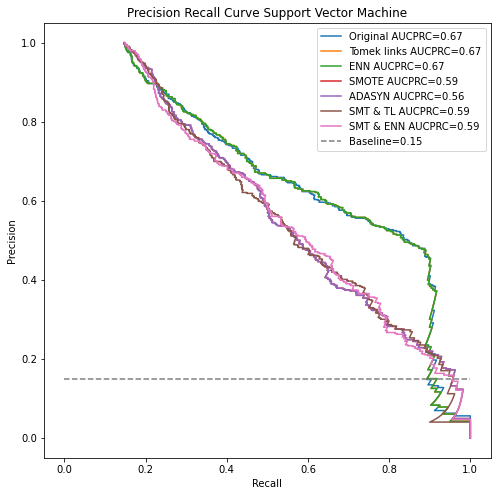

In [314]:
plt.figure(figsize=(8,8))

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_svm)
plt.plot(precision, recall, label='Original AUCPRC='+ str((metrics.average_precision_score(y_test,y_prob_svm)).round(2)))

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_svm_tl)
plt.plot(precision, recall, label='Tomek links AUCPRC='+ str((metrics.average_precision_score(y_test,y_prob_svm_tl)).round(2)))
         
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_svm_tl)
plt.plot(precision, recall, label='ENN AUCPRC='+ str((metrics.average_precision_score(y_test,y_prob_svm_enn4)).round(2)))

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_svm_smt)
plt.plot(precision, recall, label='SMOTE AUCPRC='+ str((metrics.average_precision_score(y_test,y_prob_svm_smt)).round(2)))
         
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_svm_smt)
plt.plot(precision, recall, label='ADASYN AUCPRC='+ str((metrics.average_precision_score(y_test,y_prob_svm_ada)).round(2)))

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_svm_smt_enn)
plt.plot(precision, recall, label='SMT & TL AUCPRC='+ str((metrics.average_precision_score(y_test,y_prob_svm_smt_enn)).round(2)))

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_prob_svm_smt_tl)
plt.plot(precision, recall, label='SMT & ENN AUCPRC='+ str((metrics.average_precision_score(y_test,y_prob_svm_smt_tl)).round(2)))

x_cor = [0,1]
y_cor = [0.15,0.15]

plt.plot(x_cor,y_cor, linestyle='--', label='Baseline=0.15')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='upper right')
plt.title('Precision Recall Curve Support Vector Machine')
plt.savefig('Support Vector Machine: PRC(AUC).png', bbox_inches='tight', dpi=150)
plt.show()


In [ ]:
#--------------------------------------------------------------

plt.figure(figsize=(8,8))
fpr_smote, tpr_smote, _ = metrics.roc_curve(y_test, y_prob_svm)
plt.plot(fpr_smote, tpr_smote, label= "Original AUC="+str(round(metrics.roc_auc_score(y_test,y_pred_svm),3)))

fpr, tpr, _ = metrics.roc_curve(y_test, y_prob_svm_tl)
plt.plot(fpr, tpr, label= "Tomek Links AUC="+str(metrics.roc_auc_score(y_test,y_pred_svm_tl)))

fpr, tpr, _ = metrics.roc_curve(y_test, y_prob_svm_smt)
plt.plot(fpr, tpr, label= "SMOTE AUC="+str(metrics.roc_auc_score(y_test,y_pred_svm_smt)))
plt.xlabel('False Positive Rate')

fpr, tpr, _ = metrics.roc_curve(y_test, y_prob_svm_smt_enn)
plt.plot(fpr, tpr, label= "SMT ENN AUC="+str(metrics.roc_auc_score(y_test,y_pred_svm_smt_enn)))

fpr, tpr, _ = metrics.roc_curve(y_test, y_prob_svm_smt_tl)
plt.plot(fpr, tpr, label= "SMOTE TL AUC="+str(metrics.roc_auc_score(y_test,y_pred_svm_smt_tl)))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVM')
plt.legend(loc=4)
plt.savefig('SVM: ROC.png', bbox_inches='tight', dpi=150)
plt.show()


# Compare high precision model & high recall model
None of the models score high on precision AND recall for the minority class, but there are models that score high on either ones. 
- High precision: SVM with the original dataset (0.90)
- High recall: LR with SMOTE + ENN resampling (0.85) 

Below, I'll compare the two models with each other

In [153]:
compare_outcomes = pd.DataFrame({'y_true': y_test,
                               'y_high_precision': y_pred_svm,
                                 'y_high_recall': y_pred_lr_smt_enn
                             })

In [154]:
compare_outcomes.sample(30)

,y_true,y_high_precision,y_high_recall
742,0,0,0
654,0,0,0
2077,0,0,0
711,0,0,0
306,0,0,1
1478,1,0,0
1557,0,0,1
2513,0,0,0
2384,0,0,0
2109,0,0,1


In [155]:
#make two seperate dataframes for the minority and majority class
compare_outcomes_1 = compare_outcomes[compare_outcomes['y_true'] == 1]
compare_outcomes_0 = compare_outcomes[compare_outcomes['y_true'] == 0]

In [156]:
compare_outcomes_0.sample(30)

,y_true,y_high_precision,y_high_recall
1637,0,0,0
2414,0,0,1
2158,0,0,1
1714,0,0,0
1908,0,0,0
1045,0,0,0
1464,0,0,0
1203,0,0,0
248,0,0,1
1221,0,0,1


In [157]:
### high precision vs high recall on the majority class
conditions = [
    (compare_outcomes_0['y_high_precision'] == 0) & (compare_outcomes_0['y_high_recall'] == 0),
    (compare_outcomes_0['y_high_precision'] == 0) & (compare_outcomes_0['y_high_recall'] == 1),
    (compare_outcomes_0['y_high_precision'] == 1) & (compare_outcomes_0['y_high_recall'] == 0),
    (compare_outcomes_0['y_high_precision'] == 1) & (compare_outcomes_0['y_high_recall'] == 1)]

choices = [1, 2, 3, 4]
# 1 = LR correct, RF correct
# 2 = LR correct, RF incorrect
# 3 = RF correct, LR incorrect
# 4 = RF incorrect, LR incorrect

compare_outcomes_0['compare'] = np.select(conditions, choices)

print(compare_outcomes_0['compare'].value_counts().sort_index())
print(compare_outcomes_0['compare'].value_counts(normalize=True).sort_index().round(3))

1    1692
2     877
4      21
Name: compare, dtype: int64
1    0.653
2    0.339
4    0.008
Name: compare, dtype: float64


<ipython-input-157-08a330a6a56c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare_outcomes_0['compare'] = np.select(conditions, choices)


In [158]:
### high precision vs high recall on the majority class
conditions = [
    (compare_outcomes_1['y_high_precision'] == 1) & (compare_outcomes_1['y_high_recall'] == 1),
    (compare_outcomes_1['y_high_precision'] == 1) & (compare_outcomes_1['y_high_recall'] == 0),
    (compare_outcomes_1['y_high_precision'] == 0) & (compare_outcomes_1['y_high_recall'] == 1),
    (compare_outcomes_1['y_high_precision'] == 0) & (compare_outcomes_1['y_high_recall'] == 0)]

choices = [1, 2, 3, 4]
# 1 = LR correct, RF correct
# 2 = LR correct, RF incorrect
# 3 = RF correct, LR incorrect
# 4 = RF incorrect, LR incorrect

compare_outcomes_1['compare'] = np.select(conditions, choices)

print(compare_outcomes_1['compare'].value_counts().sort_index())
print(compare_outcomes_1['compare'].value_counts(normalize=True).sort_index().round(3))

1    115
3    263
4     68
Name: compare, dtype: int64
1    0.258
3    0.590
4    0.152
Name: compare, dtype: float64


<ipython-input-158-a1e49e3350dd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare_outcomes_1['compare'] = np.select(conditions, choices)
